In [501]:
# Data Description:
# The actual concrete compressive strength (MPa) for a given mixture under a
# specific age (days) was determined from laboratory. Data is in raw form (not scaled).
# The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations).

In [502]:
# Context:
# Concrete is the most important material in civil engineering. The concrete compressive strength is a 
# highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, 
# fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

In [503]:
#Import all the necessary modules
import pandas as pandas
import numpy as numpy
import os
import matplotlib.pyplot as matplot
%matplotlib inline
import seaborn as sns
from Custom import Perform_EDA as EDA

import itertools

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
#importing kmeans clustering library
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
# Import ensemble machine learning library
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
# Import support vector regressor machine learning library
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso

#Import the Voting regressor for Ensemble
from sklearn.ensemble import VotingRegressor

In [504]:
Source = pandas.read_csv("concrete.csv", squeeze = True )

In [505]:
Source.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

In [506]:
Source.tail()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28   
1026   531.3    0.0    0.0  141.8          28.2      852.1    893.7    3   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28   
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0  270   
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7   

      strength  
1025     13.29  
1026     41.30  
1027     44.28  
1028     55.06  
1029     52.61

# 1. Exploratory data quality report

# 1.a Univariate analysis

In [507]:
# Data Types and Description

Source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [508]:
print("Shape:", Source.shape)

Shape: (1030, 9)


In [509]:
Source.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [510]:
#Analyze the distribution of the dataset
Source.describe().T

count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0   73.895825   86.279342    0.00    0.000   22.000   
ash           1030.0   54.188350   63.997004    0.00    0.000    0.000   
water         1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplastic  1030.0    6.204660    5.973841    0.00    0.000    6.400   
coarseagg     1030.0  972.918932   77.753954  801.00  932.000  968.000   
fineagg       1030.0  773.580485   80.175980  594.00  730.950  779.500   
age           1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength      1030.0   35.817961   16.705742    2.33   23.710   34.445   

                   75%     max  
cement         350.000   540.0  
slag           142.950   359.4  
ash            118.300   200.1  
water          192.000   247.0  
superplastic    10.200    32.2  
coarseagg     1029.400  1145.0  
fineagg        824.000   992.6  
age             56.000   365.0  
strength        46.135    82.6

In [511]:
# It gives the descriptive statistics (mean, median, mode, percentiles, min, max, standard deviation) 
# and count of the columns of the dataset.

# We can see that cement, slag, ash are left skewed.

In [512]:
EDA_Summary = EDA.EDA(Source)
EDA_Summary

Total Missing Values =  0.0 Data Points, Contributing to  0.0 %
Columns with values as 0

 0            slag
1             ash
2    superplastic
dtype: object 


Columns with numnber of Zeros

slag    = 471
ash    = 566
superplastic    = 379


count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0   73.895825   86.279342    0.00    0.000   22.000   
ash           1030.0   54.188350   63.997004    0.00    0.000    0.000   
water         1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplastic  1030.0    6.204660    5.973841    0.00    0.000    6.400   
coarseagg     1030.0  972.918932   77.753954  801.00  932.000  968.000   
fineagg       1030.0  773.580485   80.175980  594.00  730.950  779.500   
age           1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength      1030.0   35.817961   16.705742    2.33   23.710   34.445   

                   75%     max   Kurtosis  Skewness   Range      IQR  \
cement         350.000   540.0  -0.520652  0.509481  438.00  157.625   
slag           142.950   359.4  -0.508175  0.800717  359.40  142.950   
ash            118.300   200.1  -1.328746  0.537354  200.10  118.300   
water          192.000   247.0   0.122082  0.074628  125.20   27.100   
superplastic    10.200    32.2   1.411269  0.907203   32.20   10.200   
coarseagg     1029.400  1145.0  -0.599016 -0.040220  344.00   97.400   
fineagg        824.000   992.6  -0.102177 -0.253010  398.60   93.050   
age             56.000   365.0  12.168989  3.269177  364.00   49.000   
strength        46.135    82.6  -0.313725  0.416977   80.27   22.425   

              Missing Values  
cement                   0.0  
slag                     0.0  
ash                      0.0  
water                    0.0  
superplastic             0.0  
coarseagg                0.0  
fineagg                  0.0  
age                      0.0  
strength                 0.0

Columns that are int32,int64 =  Index(['age'], dtype='object')
Columns that are flaot32,float64 =  Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'strength'],
      dtype='object')
Columns that are objects =  Index([], dtype='object')


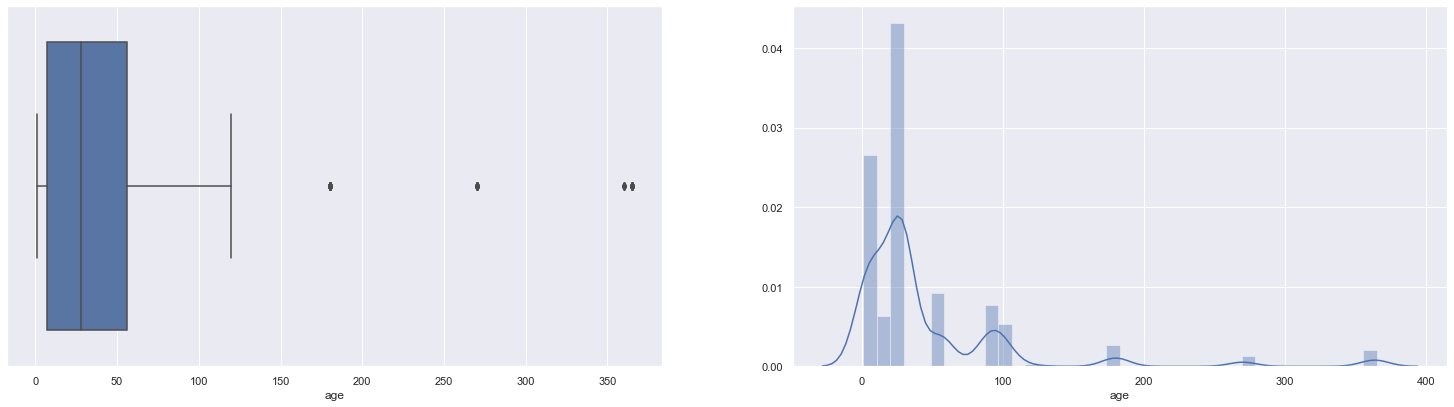

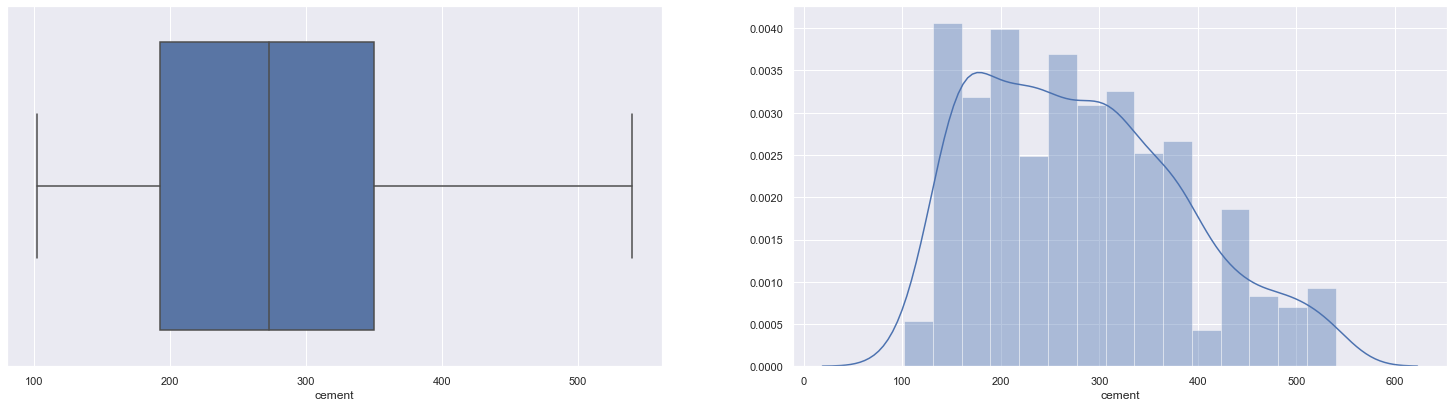

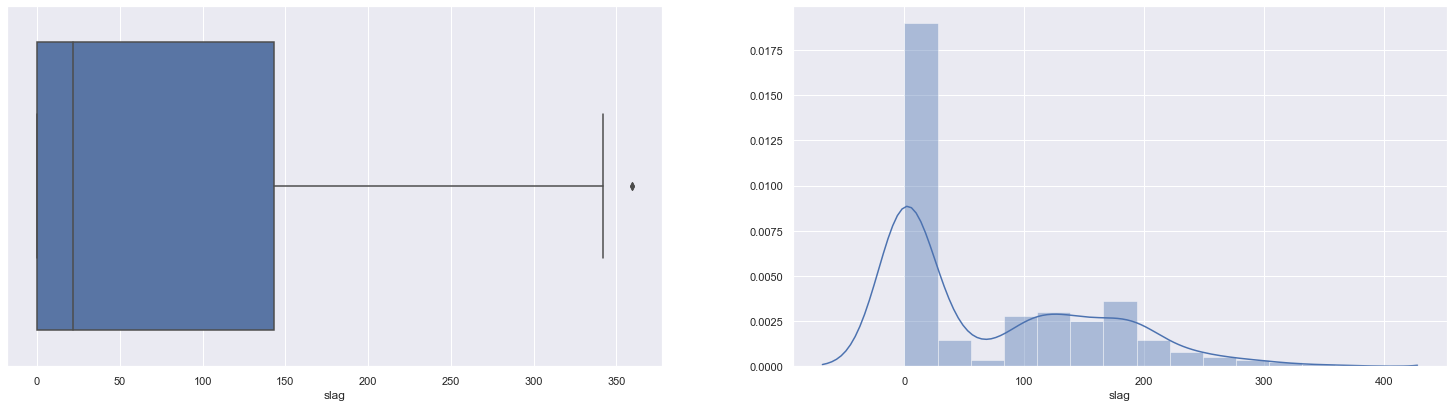

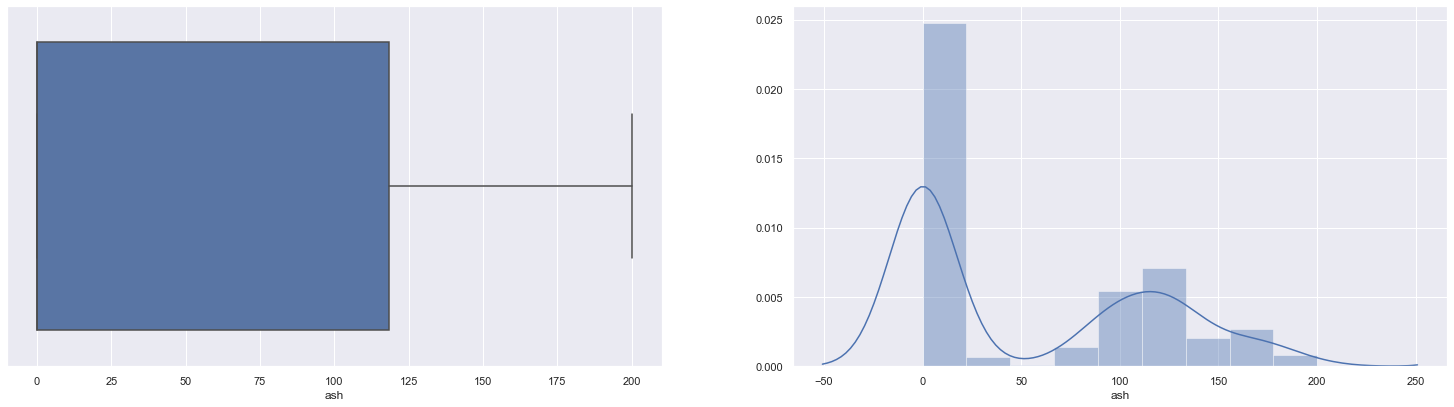

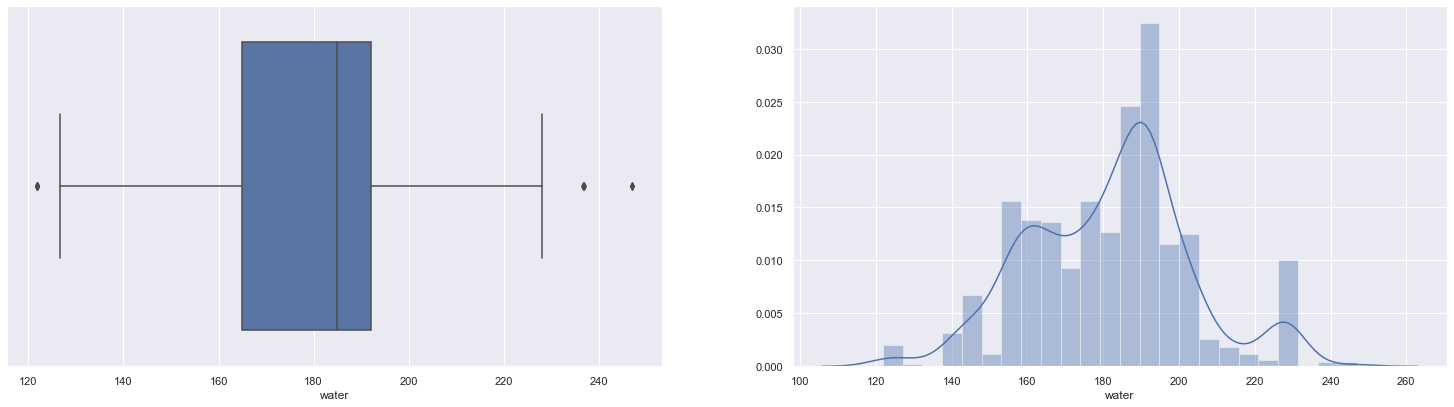

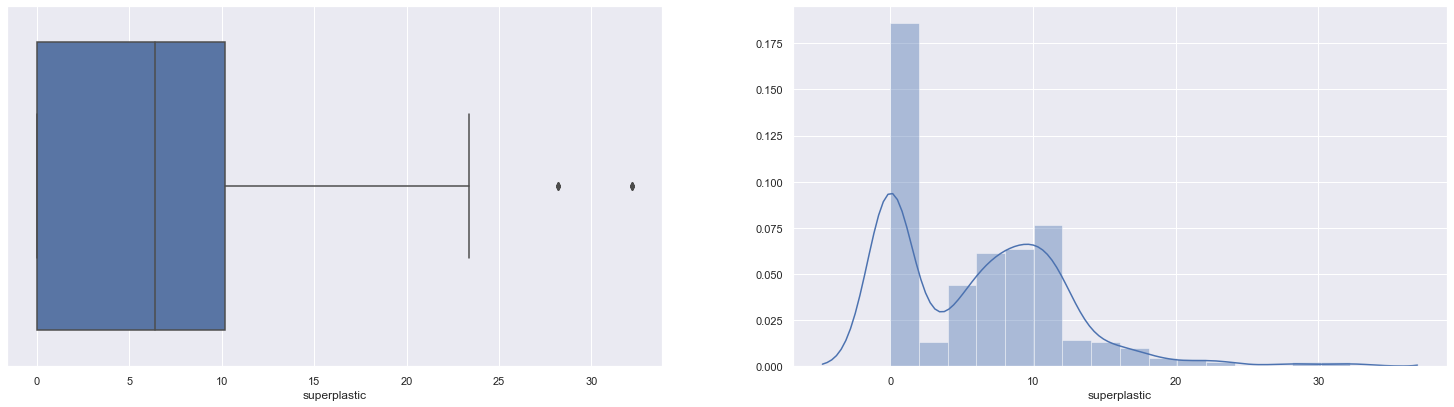

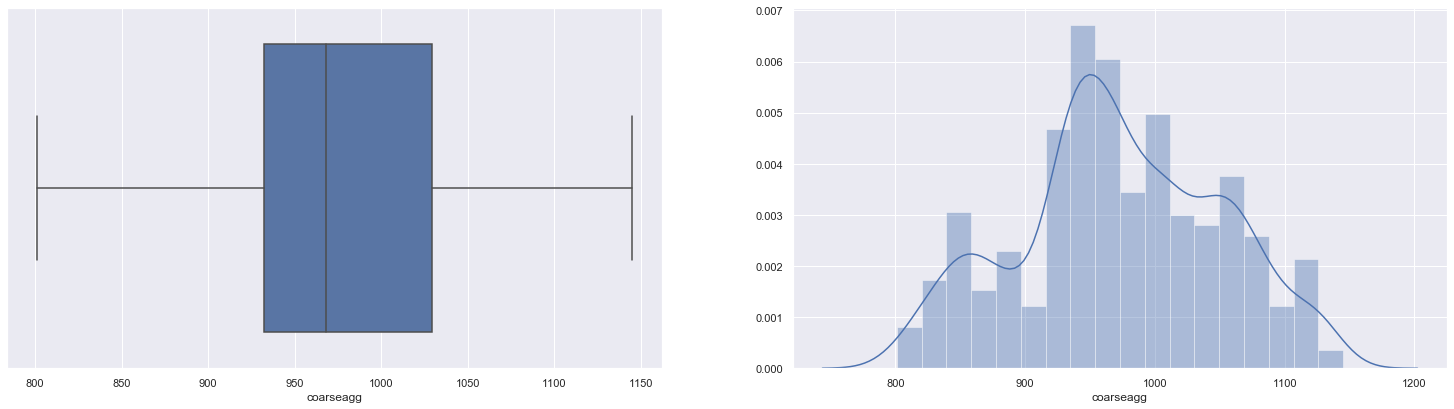

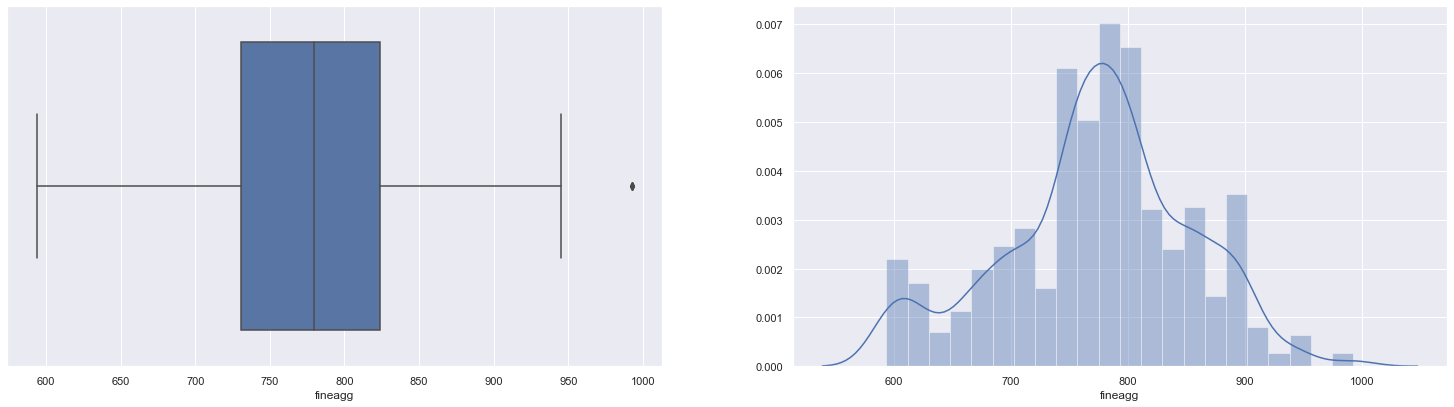

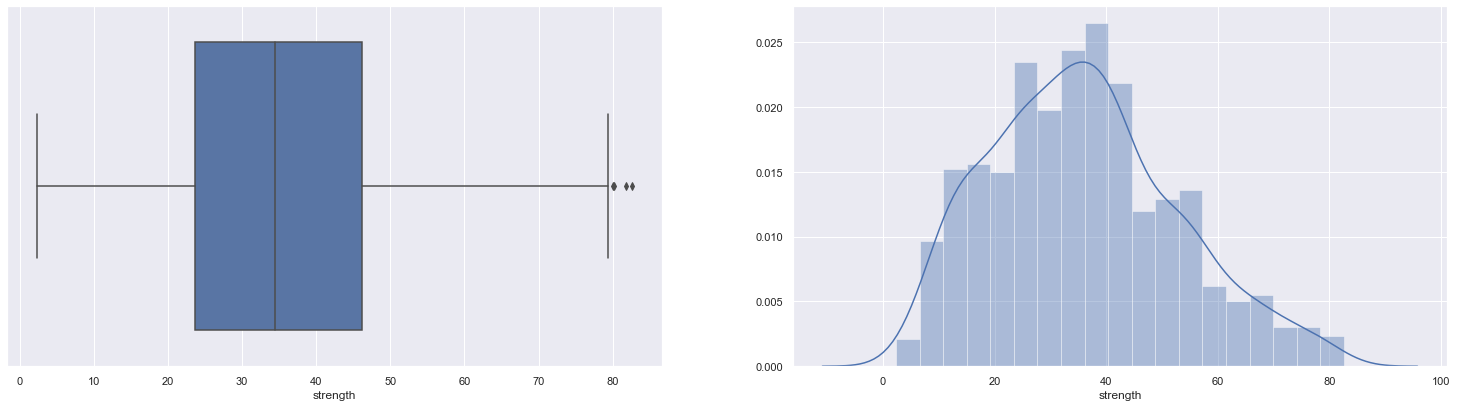

In [513]:
EDA.univariate_plots(Source)

# 1.b Multivariate Analysis

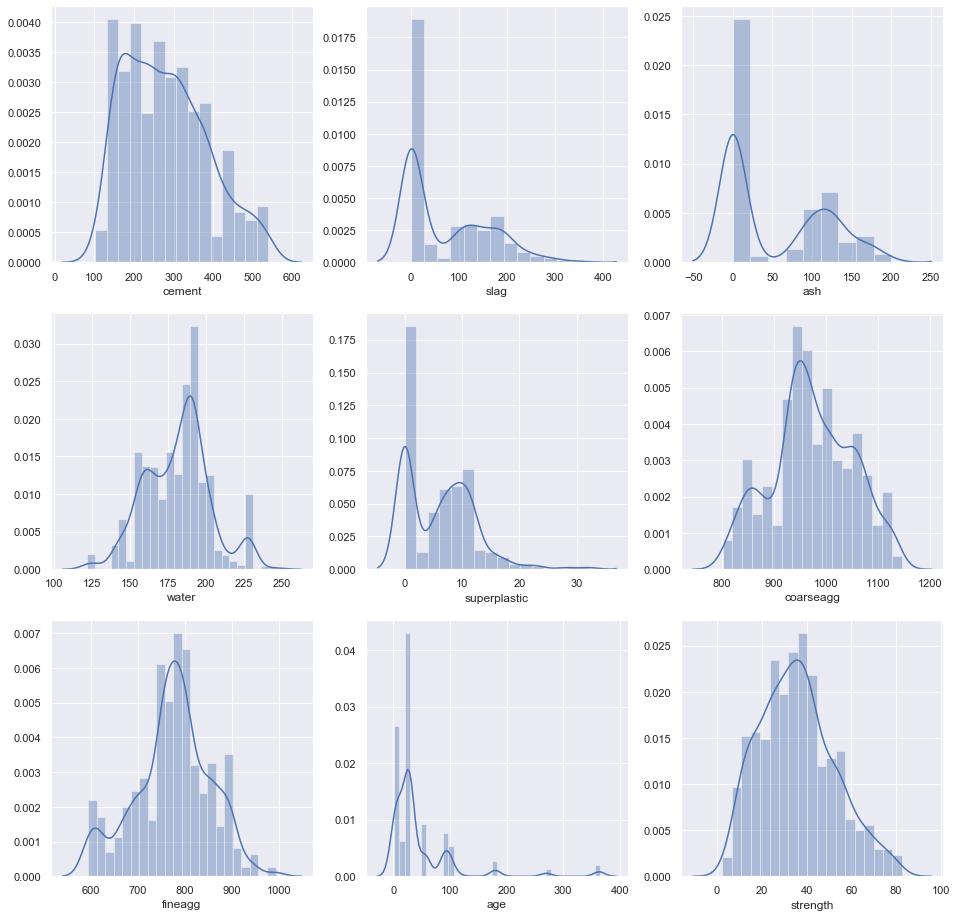

In [514]:
# Distplot
fig, ax2 = plt.subplots(3, 3, figsize=(16, 16))
sns.distplot(Source['cement'],ax=ax2[0][0])
sns.distplot(Source['slag'],ax=ax2[0][1])
sns.distplot(Source['ash'],ax=ax2[0][2])
sns.distplot(Source['water'],ax=ax2[1][0])
sns.distplot(Source['superplastic'],ax=ax2[1][1])
sns.distplot(Source['coarseagg'],ax=ax2[1][2])
sns.distplot(Source['fineagg'],ax=ax2[2][0])
sns.distplot(Source['age'],ax=ax2[2][1])
sns.distplot(Source['strength'],ax=ax2[2][2])


In [515]:
# cement is almost normally distributed.
# slag has three gausssians and rightly skewed.
# ash has two gaussians and rightly skewed.
# water has three guassians and slighly left skewed.
# superplastic has two gaussians and rightly skewed.
# coarseagg has three guassians and almost normal.
# fineagg has almost two guassians and looks like normal.
# age has multiple guassians and rightly skewed.

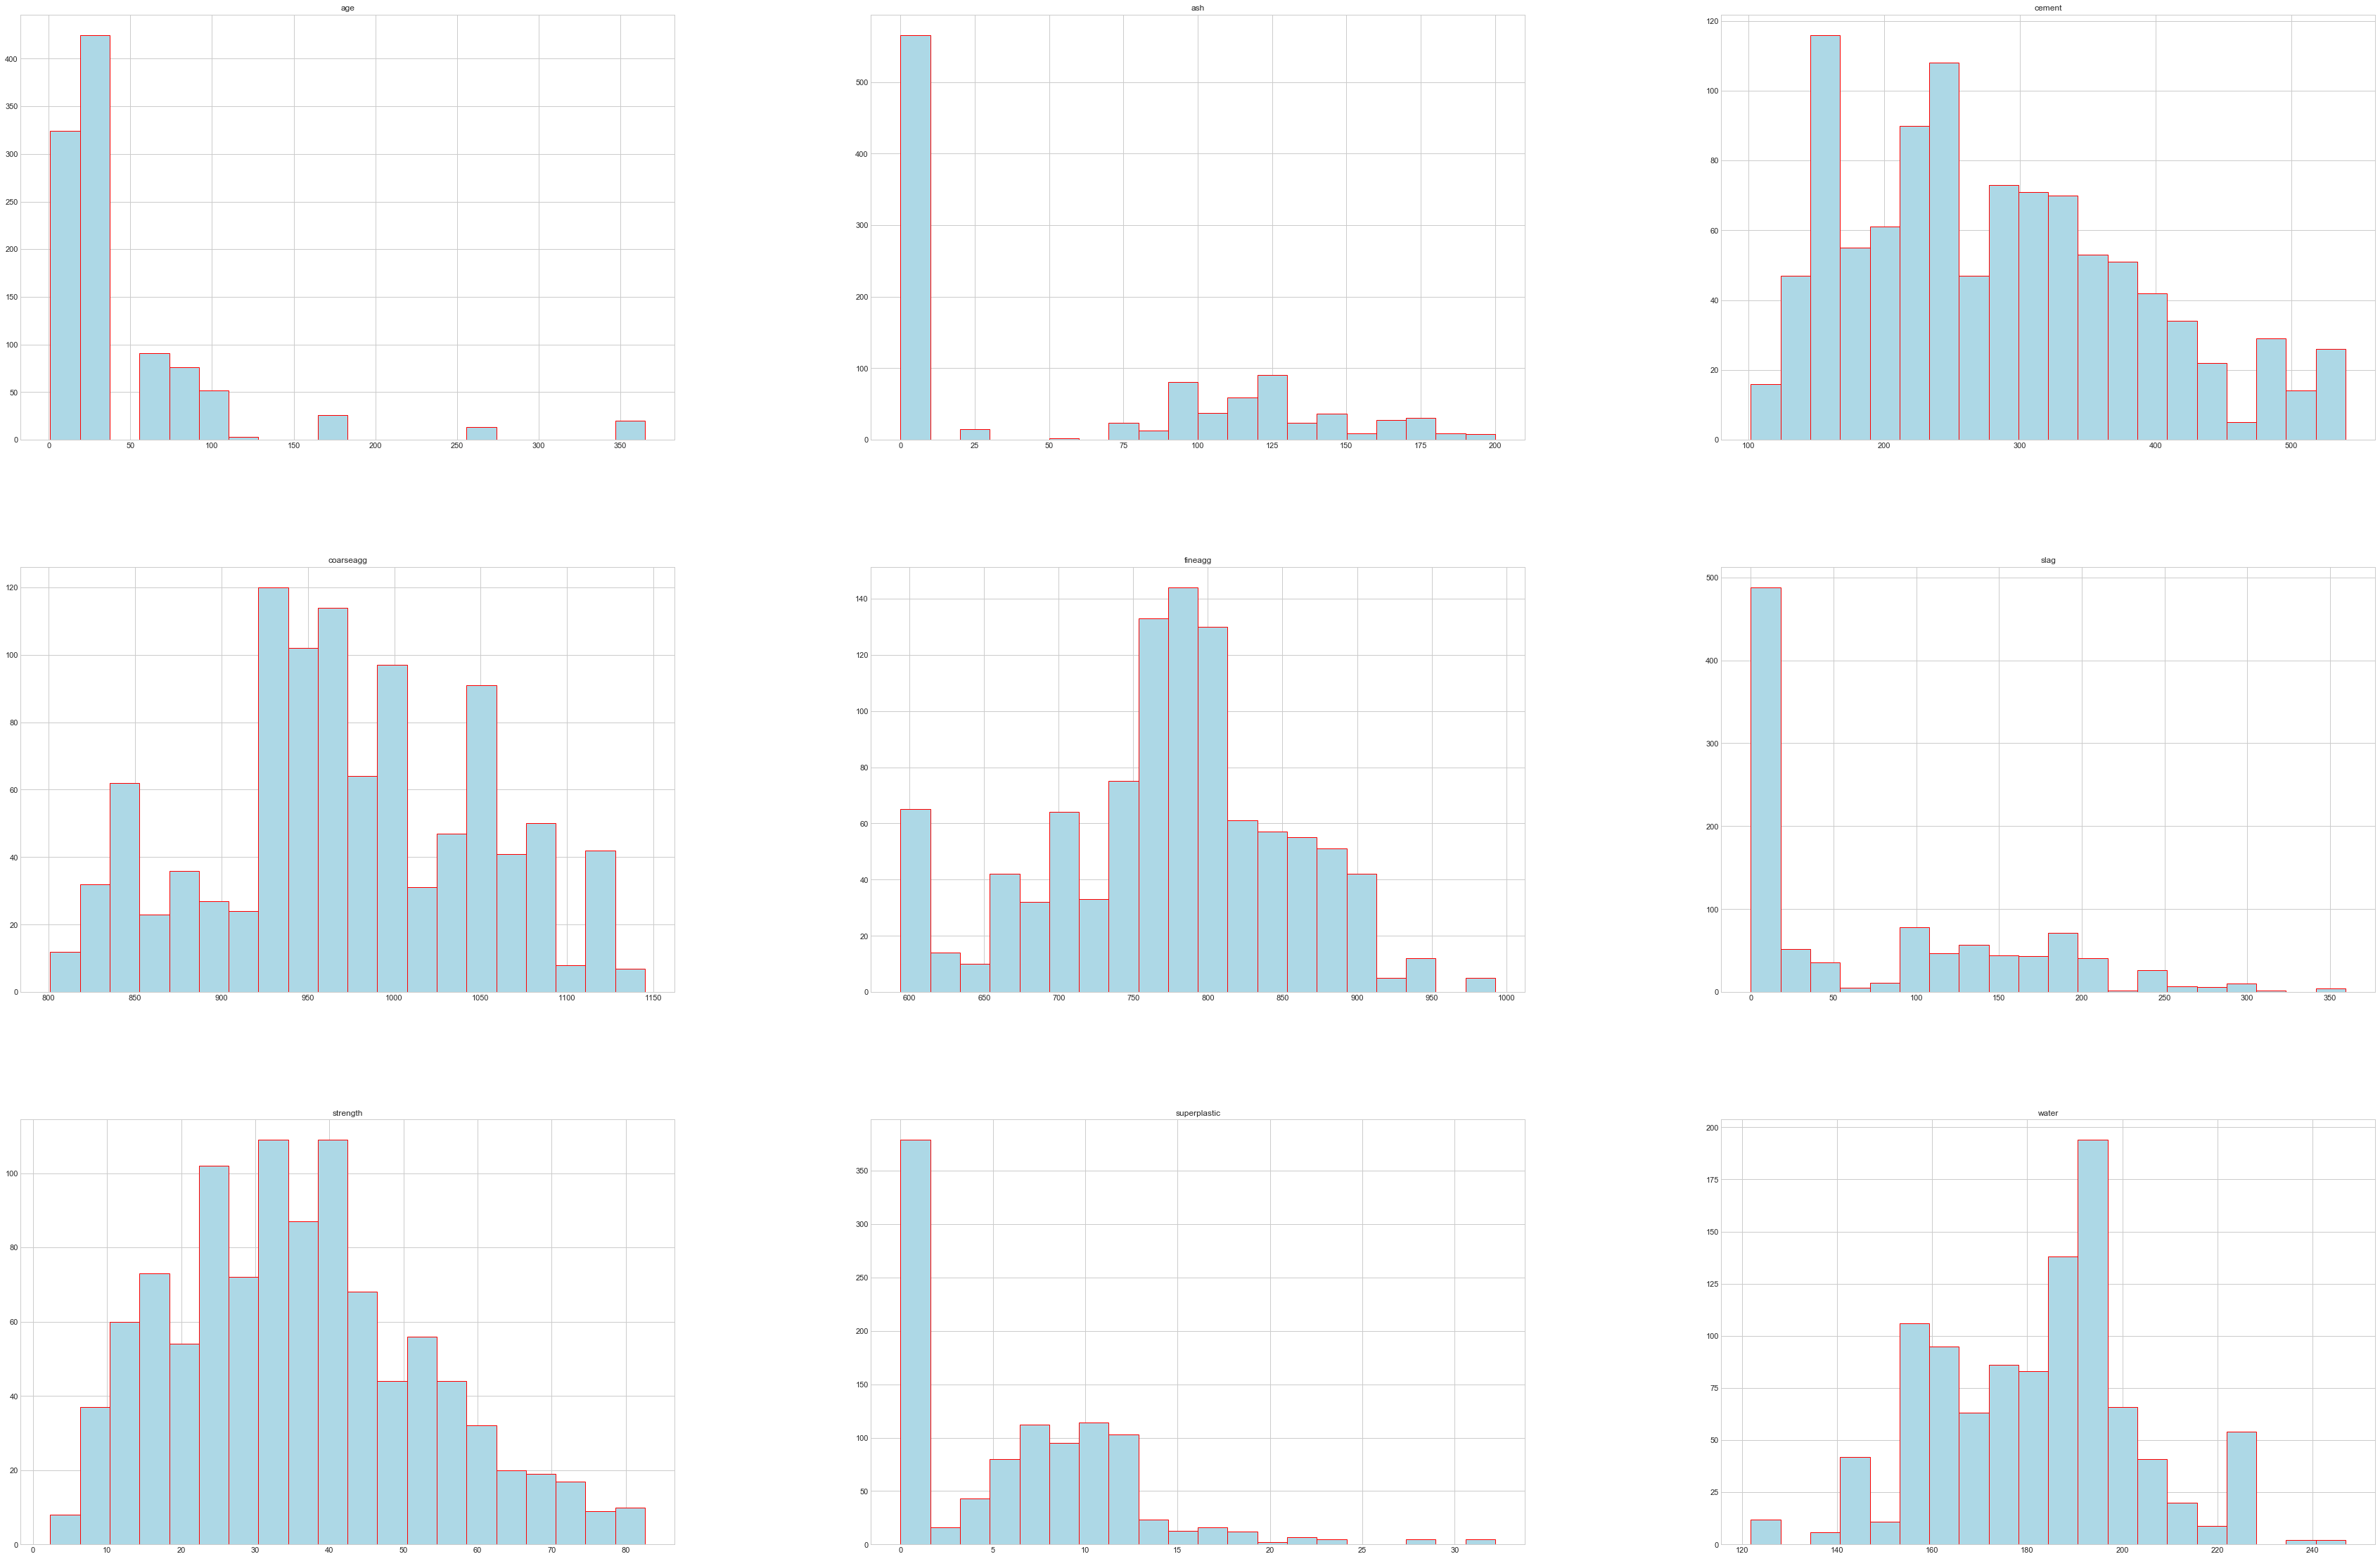

In [516]:
# Histogram 
plt.style.use('seaborn-whitegrid')

Source.hist(bins=20, figsize=(60,40), color='lightblue', edgecolor = 'red')
plt.show()

In [517]:
skewValue = Source.skew()
print("skewValue of dataframe attributes:\n\n",skewValue)

skewValue of dataframe attributes:

 cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64


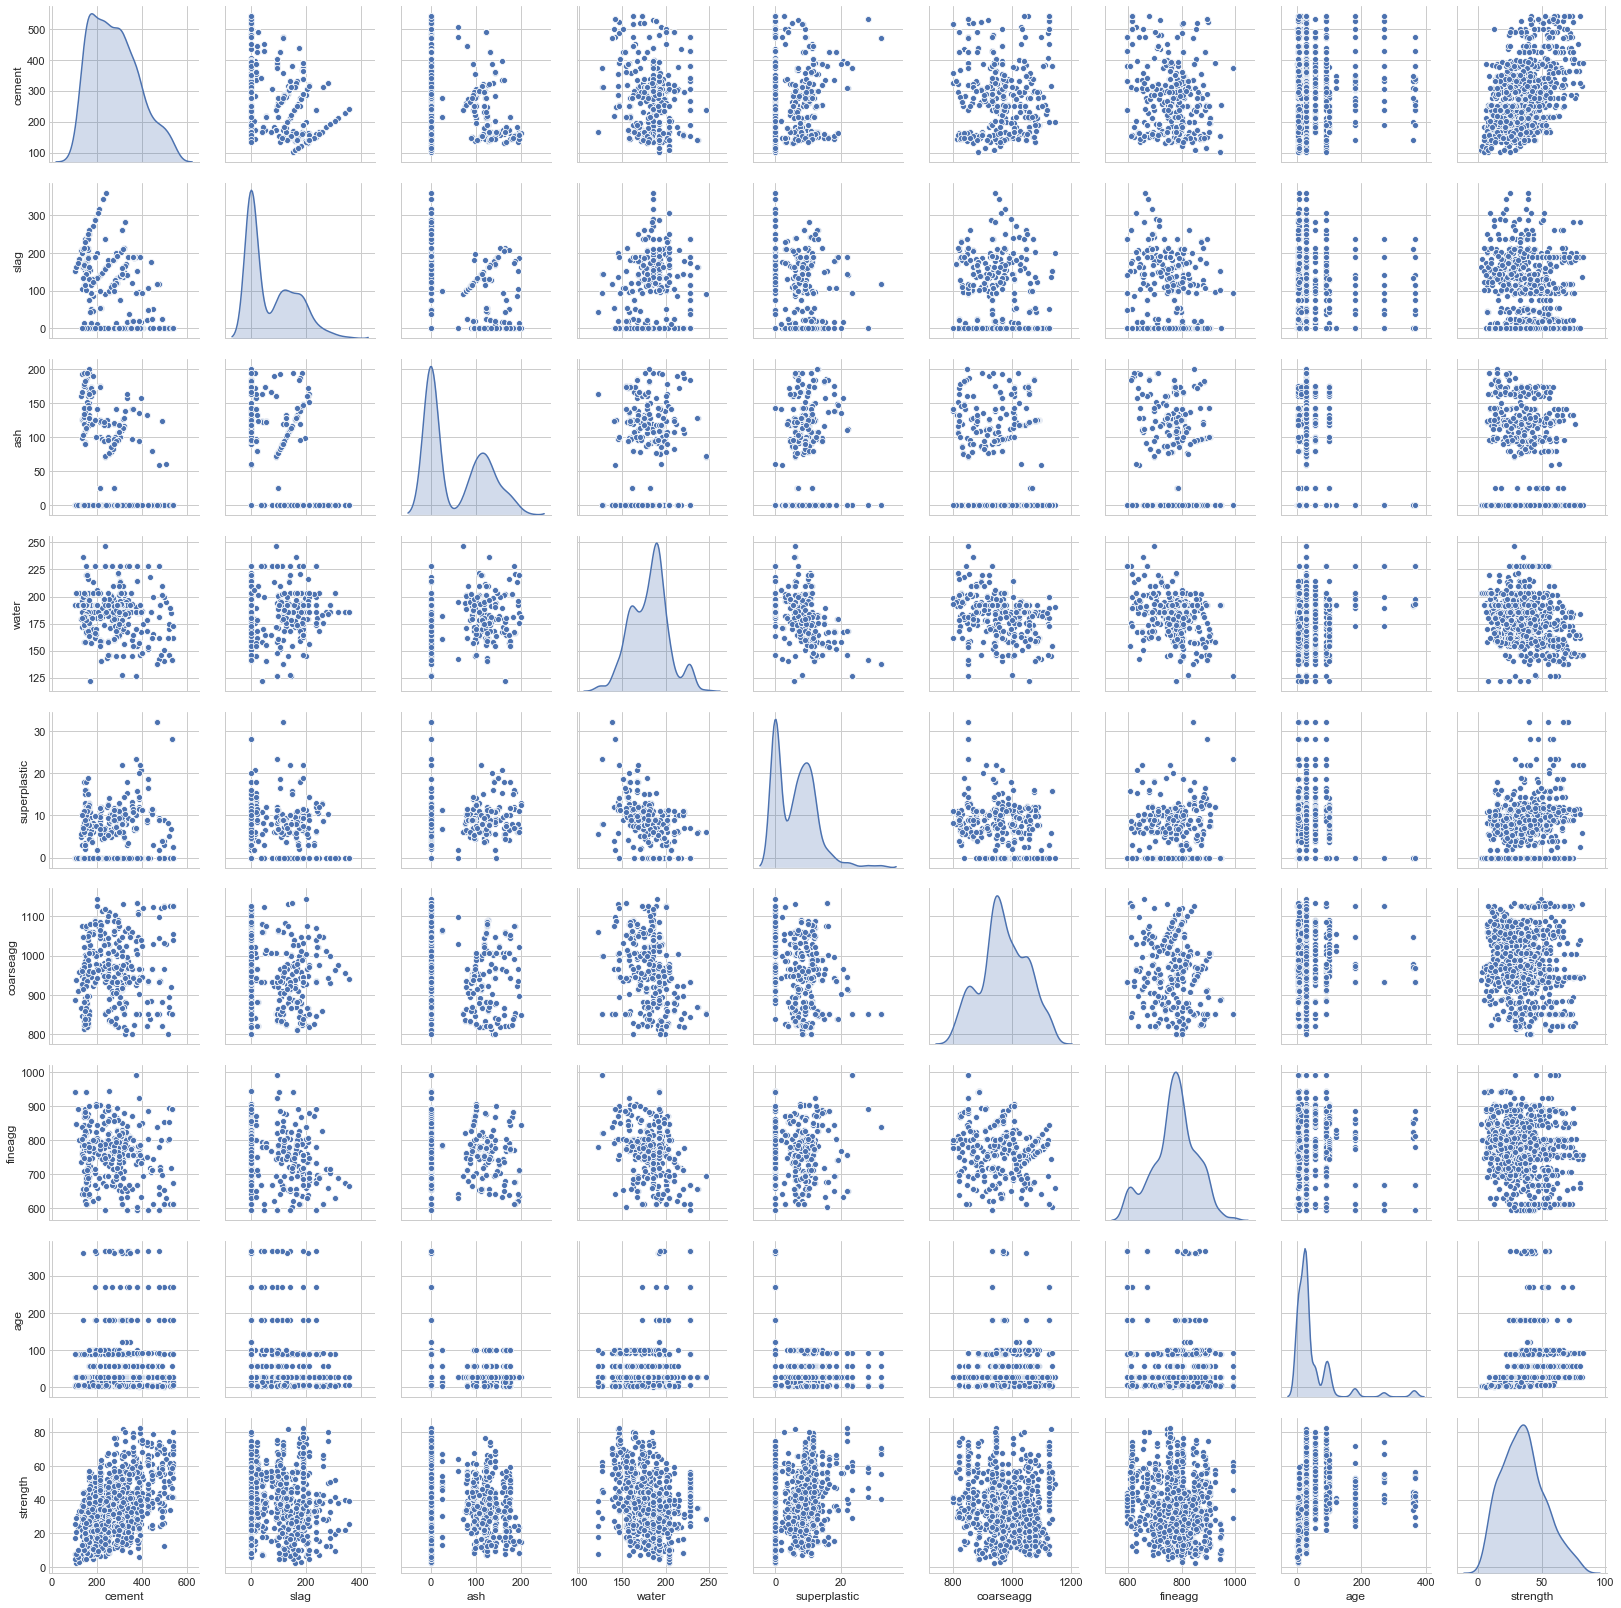

In [518]:
#compare all attributes visually to check for relationships that can be exploited
sns.pairplot(Source, diag_kind="kde")

In [519]:
# strength attribute : Relationship between dependent and independent attributes

# strength vs cement: It is linearly related to the cement. The relationship is positive and we can see that 
# for a given value of cement we have a multiple values of strength. Which one should we pick we don't know. 
# Hence Cement though it has poditive relationship with the strength, it is not a very good predictor. 
# It is a weak predictor.
# strength vs slag: There is no particular trend.
# strength vs slag: There is also no particular trend.
# strength vs age: For a given value of age, we have different values of strength. Hence, It is not a good predictor.
# strength vs superplastic:For a given value of age, we have different values of strength. Hence, It is not a good predictor.
# Other attributes does not give any strong relationship with strength.

# Hence, we can see that none of the independent attributes are a good predictors of the strength attribute. 
# There is a no linear relationship between them.

# So, we will not use Linear model

Feature  Uniqueness  Positive rel  inverse rel             Pos  \
0        cement           8             1            0        [cement]   
1          slag           8             1            0          [slag]   
2           ash           8             1            0           [ash]   
3         water           7             1            1         [water]   
4  superplastic           7             1            1  [superplastic]   
5     coarseagg           8             1            0     [coarseagg]   
6       fineagg           8             1            0       [fineagg]   
7           age           8             1            0           [age]   
8      strength           8             1            0      [strength]   

              Neg                                                 No  
0              []  [slag, ash, water, superplastic, coarseagg, fi...  
1              []  [cement, ash, water, superplastic, coarseagg, ...  
2              []  [cement, slag, water, superplastic, coarseagg,...  
3  [superplastic]  [cement, slag, ash, coarseagg, fineagg, age, s...  
4         [water]  [cement, slag, ash, coarseagg, fineagg, age, s...  
5              []  [cement, slag, ash, water, superplastic, finea...  
6              []  [cement, slag, ash, water, superplastic, coars...  
7              []  [cement, slag, ash, water, superplastic, coars...  
8              []  [cement, slag, ash, water, superplastic, coars...

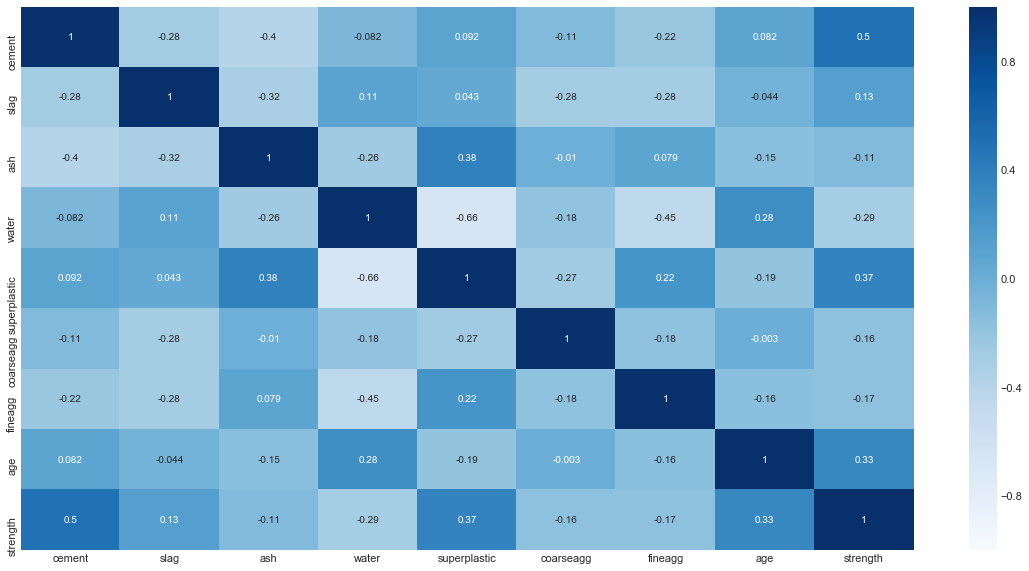

In [520]:
EDA.EDA_Corr(Source)

In [521]:
# water shows significant negative relationship with superplastic and fineagg. 
# And, water also shows some kind of positive relationship with slag and age.
# cement has highest positive correlation with strength, followed by superplastic

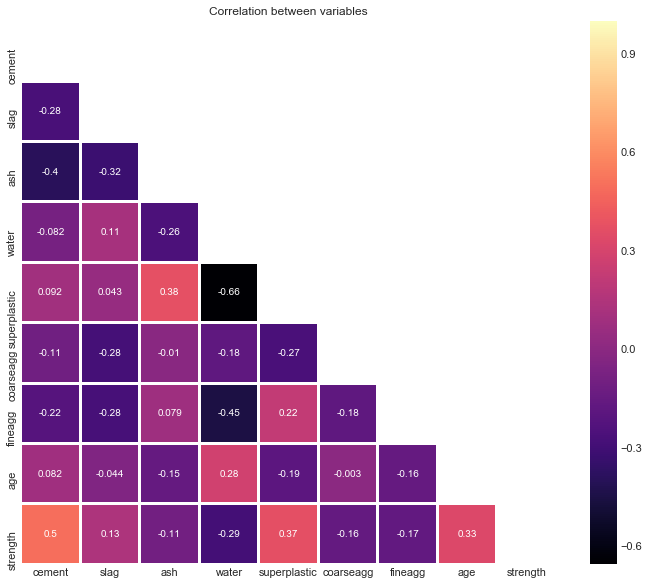

In [522]:
cor = Source.corr()

mask = numpy.zeros_like(cor)
mask[numpy.triu_indices_from(mask)] = True

plt.figure(figsize=(12,10))

with sns.axes_style("white"):
    sns.heatmap(cor,annot=True,linewidth=2,
                mask = mask,cmap="magma")
plt.title("Correlation between variables")
plt.show()


In [523]:
#Checking for missing values
Source.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [524]:
# We can see that there are no missing values.

In [525]:
Source.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

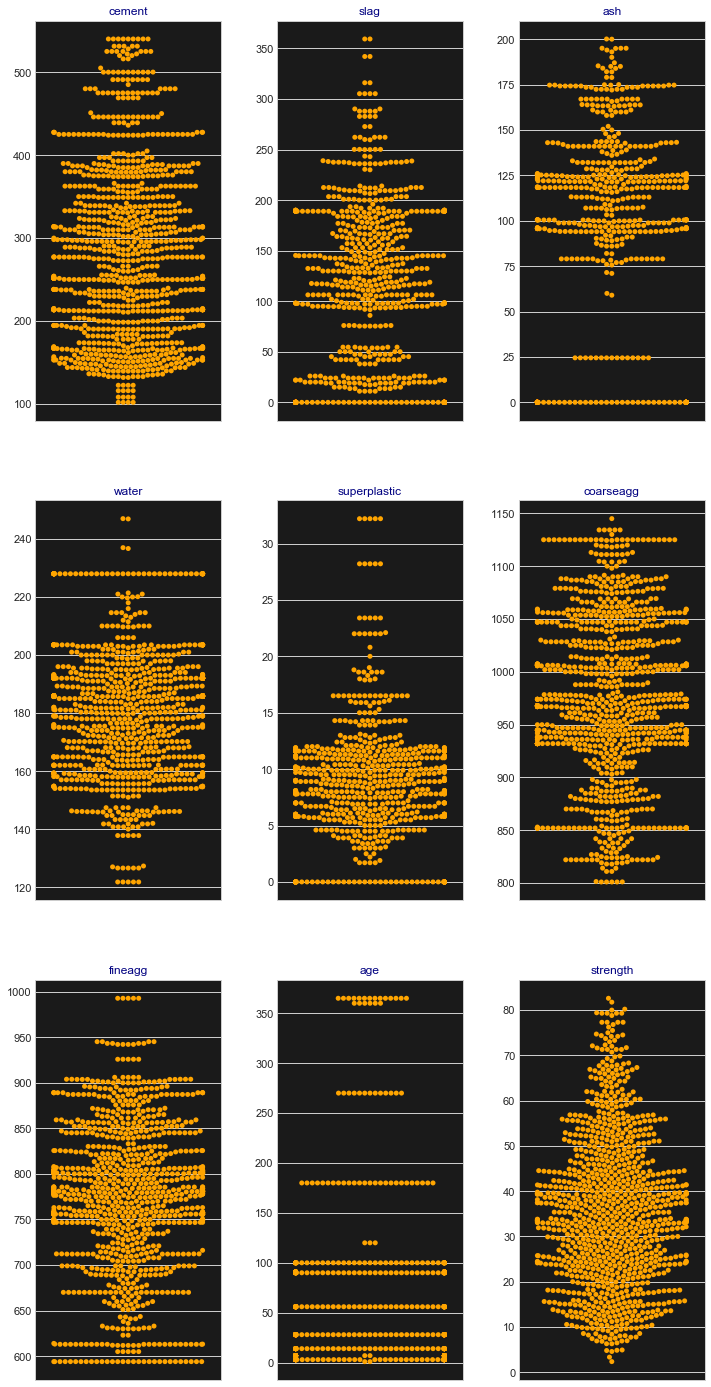

In [526]:
cols = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'] 



length = len(cols)

plt.figure(figsize=(12,25))

for i,j in itertools.zip_longest(cols,range(length)):
    
    plt.subplot(3,3,j+1)
    ax = sns.swarmplot( y = Source[i],color="orange")
    ax.set_facecolor("k")
    ax.set_ylabel("")
    ax.set_title(i,color="navy")
    plt.subplots_adjust(wspace = .3)


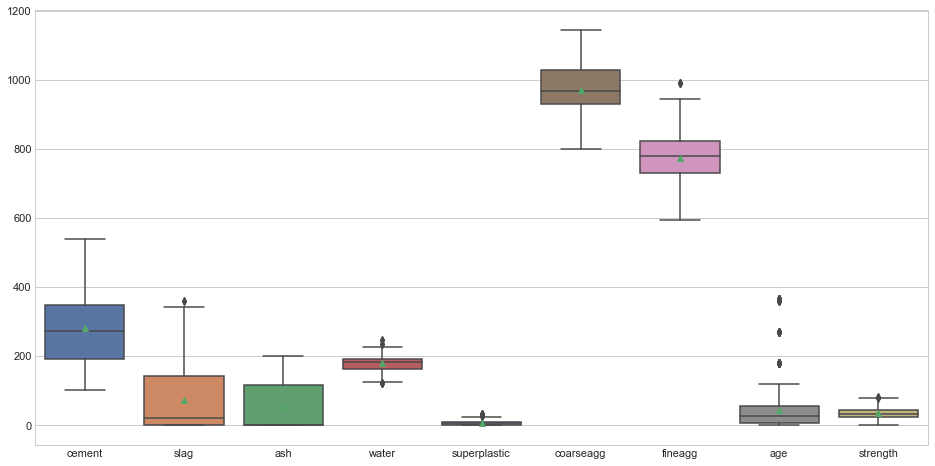

In [527]:
#Summary View of all attribute , The we will look into all the boxplot individually to trace out outliers
matplot.figure(figsize=(16, 8))
ax = sns.boxplot(data=Source, showmeans=True)

In [528]:
# It also shows that slag, ash, water superplastic, and age contains outliers.

In [529]:
#Number of outliers present in the dataset
print('Number of outliers in cement: ', 
      Source[((Source.cement - Source.cement.mean()) / Source.cement.std()).abs() > 3]['cement'].count())

print('Number of outliers in slag: ',
      Source[((Source.slag - Source.slag.mean()) / Source.slag.std()).abs() > 3]['slag'].count())

print('Number of outliers in ash: ',
      Source[((Source.ash - Source.ash.mean()) / Source.ash.std()).abs() >3]['ash'].count())

print('Number of outliers in water: ',
      Source[((Source.water - Source.water.mean()) / Source.water.std()).abs() >3]['water'].count())

print('Number of outliers in superplastic: ',
      Source[((Source.superplastic - Source.superplastic.mean()) / Source.superplastic.std()).abs() >3]['superplastic'].count())

print('Number of outliers in coarseagg: ',
      Source[((Source.coarseagg - Source.coarseagg.mean()) / Source.coarseagg.std()).abs() >3]['coarseagg'].count())

print('Number of outliers in fineagg: ',
      Source[((Source.fineagg - Source.fineagg.mean()) / Source.fineagg.std()).abs() >3]['fineagg'].count())

print('Number of outliers in age: ',
      Source[((Source.age - Source.age.mean()) / Source.age.std()).abs() >3]['age'].count())



Number of outliers in cement:  0
Number of outliers in slag:  4
Number of outliers in ash:  0
Number of outliers in water:  2
Number of outliers in superplastic:  10
Number of outliers in coarseagg:  0
Number of outliers in fineagg:  0
Number of outliers in age:  33


In [530]:
# We can see that slag, water, superplastic and age contain outliers.

In [531]:
Source_test = Source.copy()

In [532]:
# Treating Outliers Using IQR: Upper whisker
# The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, 
# is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, 
# or between upper and lower quartiles, IQR = Q3 − Q1.


from scipy.stats import iqr

Q1 = Source_test.quantile(0.25)
Q3 = Source_test.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

cement          157.625
slag            142.950
ash             118.300
water            27.100
superplastic     10.200
coarseagg        97.400
fineagg          93.050
age              49.000
strength         22.425
dtype: float64


In [533]:
cleandf = Source_test[~((Source_test < (Q1 - 1.5 * IQR)) | (Source_test > (Q3 + 1.5 * IQR))).any(axis=1)]
cleandf.shape

(941, 9)

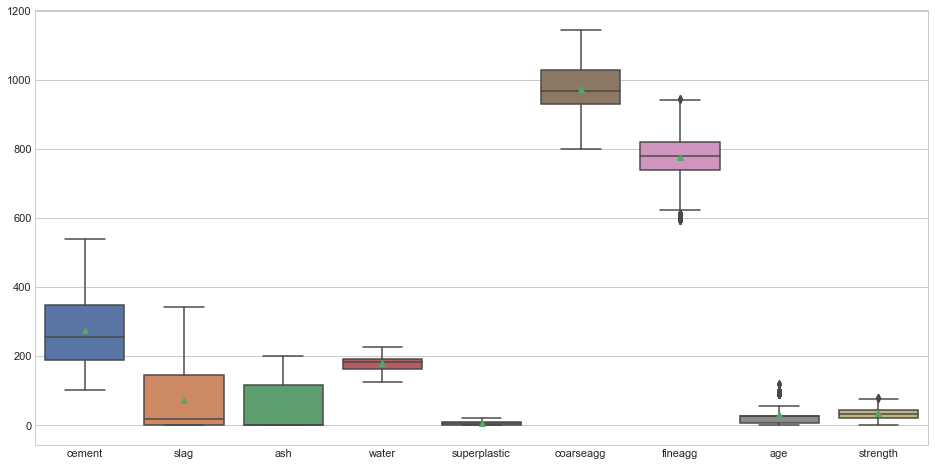

In [534]:
# Summary View of all attribute after treating the outliers
matplot.figure(figsize=(16, 8))
ax = sns.boxplot(data=cleandf, showmeans=True)

# Feature Engineering, Model Building and Model Tuning

In [535]:
# Scaling the dataset
Source_scaled = cleandf.apply(zscore)
Source_scaled = pandas.DataFrame(Source_scaled, columns = Source.columns)
Source_scaled.head(10)

cement      slag       ash     water  superplastic  coarseagg   fineagg  \
0 -1.320436  1.600464 -0.901915  1.221086     -1.170347  -0.038764 -0.373850   
1 -1.049407 -0.366817  1.030317 -1.190996      0.852855   1.365779  0.261853   
2 -0.253012 -0.855740  0.585732  0.361916     -0.140012  -0.230761  1.128113   
3 -0.095894  0.465049 -0.901915  2.528520     -1.170347  -0.551615 -1.420026   
4 -1.187867  1.269108 -0.901915  0.676767      0.534388   0.935396 -1.064193   
5 -0.203913 -0.855740 -0.901915  0.607393     -1.170347  -1.095393  2.244924   
6 -1.070028  2.043045 -0.901915  1.221086     -1.170347   0.010202 -1.118834   
7 -0.239264 -0.855740  0.937047  0.420617      0.028588   0.690568 -0.251240   
8  0.198703 -0.855740 -0.901915  0.607393     -1.170347   1.419899 -0.153953   
9 -1.185903  1.276060  1.321007  0.714122      0.515655  -1.221673 -1.033541   

        age  strength  
0 -0.153317 -0.301358  
1 -0.643796 -0.686073  
2 -0.153317 -0.341759  
3 -0.153317  0.661031  
4 -0.153317 -1.000839  
5  2.018806 -0.785568  
6 -0.889036 -1.154002  
7  0.827642  0.105667  
8 -0.153317 -0.798231  
9 -0.153317 -0.355628

In [536]:
# Splitting the data into independent and dependent attributes
X = Source_scaled.iloc[:,0:8]
y = Source_scaled.iloc[:,8]
X

cement      slag       ash     water  superplastic  coarseagg  \
0    -1.320436  1.600464 -0.901915  1.221086     -1.170347  -0.038764   
1    -1.049407 -0.366817  1.030317 -1.190996      0.852855   1.365779   
2    -0.253012 -0.855740  0.585732  0.361916     -0.140012  -0.230761   
3    -0.095894  0.465049 -0.901915  2.528520     -1.170347  -0.551615   
4    -1.187867  1.269108 -0.901915  0.676767      0.534388   0.935396   
5    -0.203913 -0.855740 -0.901915  0.607393     -1.170347  -1.095393   
6    -1.070028  2.043045 -0.901915  1.221086     -1.170347   0.010202   
7    -0.239264 -0.855740  0.937047  0.420617      0.028588   0.690568   
8     0.198703 -0.855740 -0.901915  0.607393     -1.170347   1.419899   
9    -1.185903  1.276060  1.321007  0.714122      0.515655  -1.221673   
10   -1.217327  1.207703  1.254163 -0.700041      2.257857  -0.396987   
11   -1.009145  0.488221 -0.901915  0.607393     -1.170347  -0.360907   
12    1.072675 -0.855740 -0.901915  0.287205     -1.170347  -0.113501   
13   -0.375761  1.895904 -0.901915  2.528520     -1.170347  -0.551615   
14   -1.068064  1.310818  2.129342  0.233840      0.140988  -0.989730   
15   -0.608493  0.280834 -0.521065  0.057737      0.084788   1.175071   
16   -0.375761  1.895904 -0.901915  2.528520     -1.170347  -0.551615   
17    0.591500 -0.855740 -0.901915  0.073746     -0.608346   0.144213   
18   -0.835333 -0.855740  1.047416 -0.988210      0.290855   1.484328   
19    0.362696 -0.855740 -0.901915 -0.134376      0.328321   0.320748   
20   -0.452356 -0.855740  0.935493  0.778160     -0.027612   0.686702   
21   -0.469050  3.107786 -0.901915  0.271196     -1.170347  -0.244935   
22   -0.390491  0.963241 -0.901915  0.607393     -1.170347  -0.028455   
23   -1.411761  1.542535  1.600815 -0.086348     -0.233679  -1.389187   
24    0.542400 -0.855740 -0.901915  0.607393     -1.170347   0.646756   
25    0.336182  0.801039 -0.901915 -0.673359      0.702989  -0.783558   
26    0.277263  0.024786 -0.901915  2.528520     -1.170347  -0.551615   
27    1.465471  0.375838 -0.901915 -1.447146      1.920657  -1.581184   
28   -1.076902 -0.855740  1.636568 -0.219759     -0.327346   1.079716   
29   -0.203913  0.291261  0.295043  0.447299     -0.046346  -0.719130   
...        ...       ...       ...       ...           ...        ...   
996  -0.960045  0.648106  0.941711 -0.038319     -0.495946   0.418679   
997  -1.097524  1.032757  1.087833  0.874216      0.328321  -0.177930   
998  -1.136804  2.040727 -0.901915 -0.673359      1.077656   0.956013   
999  -1.064136  0.649264  1.097160 -0.273124      0.290855   0.405793   
1000 -1.087704 -0.855740  1.330333 -0.897490     -1.170347   0.396773   
1001 -0.412095 -0.855740  0.568633  0.922244     -0.308613  -0.358330   
1002  0.396083  1.585403 -0.901915  0.271196     -1.170347   0.028242   
1004 -0.253012 -0.855740  0.585732  0.596720     -0.177479  -0.333847   
1005  1.092315 -0.624023  0.559306 -1.260370      1.508523  -0.474301   
1006 -1.156444 -0.855740  2.129342  2.101603      0.890322  -0.989730   
1007  0.120144  1.368747 -0.901915  0.607393     -1.170347  -0.551615   
1008 -0.611439 -0.855740  1.806008 -1.388445      1.021456   0.998536   
1009 -0.609475  0.280834 -0.521065  0.057737      0.122255   1.172493   
1010 -0.839261 -0.855740  1.044307 -0.748069      0.684255   1.342585   
1011  0.365642 -0.855740 -0.901915 -0.139712      0.328321   0.324613   
1012  0.198703 -0.855740 -0.901915  0.607393     -1.170347   1.419899   
1013  0.817357 -0.635609  1.289917 -1.420464      0.871589  -0.422758   
1014 -1.204561  0.824211  0.854659 -0.113030      0.328321  -1.386610   
1015  0.218343 -0.855740  0.761390  0.287205     -0.046346  -1.234558   
1016 -1.333202  0.685181  0.699210  1.034310      0.140988  -0.757787   
1018 -1.264463  0.476635  0.481582  1.141039      0.515655  -1.479387   
1019  0.120144  1.368747 -0.901915  0.607393     -1.170347  -0.551615   
1020 -0.902108  0.564687 -0.901915  1.221086     -1.170347  -0.201

In [537]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# DecisionTree Regression

In [538]:
# Import Decision Tree Regressor machine learning library
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [539]:
#printing the feature importance
print('Feature importances: \n', pandas.DataFrame(dt_model.feature_importances_,
                                                columns=['Imp'], index = X_train.columns))


Feature importances: 
                    Imp
cement        0.374155
slag          0.088304
ash           0.011483
water         0.118680
superplastic  0.022849
coarseagg     0.028630
fineagg       0.018991
age           0.336907


In [540]:
# cement, age and water are significant attributes.
# ash, coarseagg, fineagg, superplastic and slag are the less significant variable.
# These will impact less to the strength column. 

In [541]:
#Import the metrics
from sklearn import metrics

y_pred = dt_model.predict(X_test)

# performance on train data
print('Performance on training data using DT:',dt_model.score(X_train, y_train))

# performance on test data
print('Performance on testing data using DT:',dt_model.score(X_test, y_test))

#Evaluate the model using accuracy
acc_DT = metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)

print('MSE: ', metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.9994733087146502
Performance on testing data using DT: 0.801043202621901
Accuracy DT:  0.801043202621901
MSE:  0.2062010472967955


In [542]:
# overfitting in the model as the dataset is performing 99% accurately in trainnig data
# but the accuracy drops in test data


In [543]:
# Lets store the accuracy results for each model in a dataframe for final comparison
results = pandas.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT},index={'1'})
results = results[['Method', 'accuracy']]
results

Method  accuracy
1  Decision Tree  0.801043

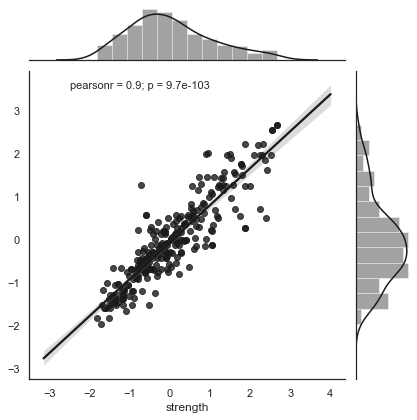

In [544]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

# K Fold Cross Validation

In [545]:
# Evaluate using Cross Validation
from sklearn import model_selection
#importing the cross validation score
from sklearn.model_selection import cross_val_score


In [546]:
seed = 66
kfold = model_selection.KFold(n_splits=10)

results1 = cross_val_score(dt_model, X, y, cv = kfold)

accuracy = numpy.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())


Average accuracy:  0.8670635095132024
Standard Deviation:  0.030897922964166647


In [547]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pandas.DataFrame({'Method':['Decision Tree k fold'], 'accuracy': [accuracy]},index={'2'})
results = pandas.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1         Decision Tree  0.801043
2  Decision Tree k fold  0.867064

# Iteration 2


In [548]:
## Drop the least significant variable

In [549]:
Source_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 941 entries, 0 to 1029
Data columns (total 9 columns):
cement          941 non-null float64
slag            941 non-null float64
ash             941 non-null float64
water           941 non-null float64
superplastic    941 non-null float64
coarseagg       941 non-null float64
fineagg         941 non-null float64
age             941 non-null float64
strength        941 non-null float64
dtypes: float64(9)
memory usage: 73.5 KB


In [550]:
#Create a copy of the dataset
Source_scaled_copy = Source_scaled.copy()

In [551]:
#independent and dependent variable
X = Source_scaled_copy.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = Source_scaled_copy['strength']

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [552]:
print(X_train.shape)
print(y_train.shape)

(658, 5)
(658,)


In [553]:
t_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [554]:
#printing the feature importance
print('Feature importances: \n', pandas.DataFrame(dt_model.feature_importances_,
                                                columns=['Imp'], index = X_train.columns))



Feature importances: 
                    Imp
cement        0.389133
slag          0.098258
water         0.136886
superplastic  0.037304
age           0.338419


In [555]:
#Import the metrics
from sklearn import metrics

y_pred = dt_model.predict(X_test)

# performance on train data
print('Performance on training data using DT:',dt_model.score(X_train, y_train))

# performance on test data
print('Performance on testing data using DT:',dt_model.score(X_test, y_test))

#Evaluate the model using accuracy
acc_DT = metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)

print('MSE: ', metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.9992217307573867
Performance on testing data using DT: 0.8009516800034404
Accuracy DT:  0.8009516800034404
MSE:  0.20629590236094308


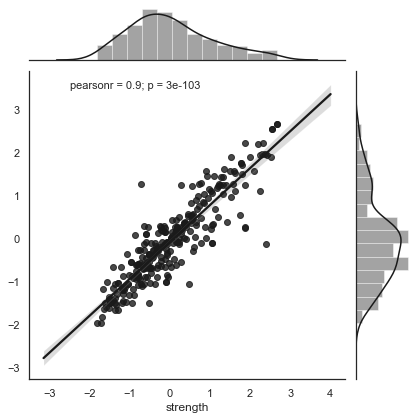

In [556]:
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x = y_test, y = y_pred, stat_func = pearsonr, kind = "reg", color = "k");

In [557]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pandas.DataFrame({'Method':['Decision Tree k2'], 'accuracy': [acc_DT]},index={'3'})
results = pandas.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1         Decision Tree  0.801043
2  Decision Tree k fold  0.867064
3      Decision Tree k2  0.800952

In [558]:
print(X_train.shape)
print(y_train.shape)

(658, 5)
(658,)


In [559]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

Credit_Tree_File = open('concrete_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train))

Credit_Tree_File.close()

In [560]:
# You can also copy the script in the .dot file and paste it at http://webgraphviz.com/ to get tree view 
#or create a .png as below

system("dot -Tpng concrete_tree.dot -o concrete_tree.png")
Image("concrete_tree.png")

# Regularising/Pruning of Decision Tree

In [561]:
#independent and dependent variables

X = Source_scaled.iloc[:,0:8]
y = Source_scaled.iloc[:,8]

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)


In [562]:
# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeRegressor( max_depth = 4, random_state = 1, min_samples_leaf = 5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [563]:
#printing the feature importance
print('Feature importances: \n', pandas.DataFrame(reg_dt_model.feature_importances_,
                                                columns=['Imp'], index = X_train.columns))




Feature importances: 
                    Imp
cement        0.420986
slag          0.053406
ash           0.000000
water         0.126952
superplastic  0.005321
coarseagg     0.000000
fineagg       0.000000
age           0.393334


In [564]:
# Here we can see ash, coarseagg and fineagg is insignificant

In [565]:
y_pred = reg_dt_model.predict(X_test)

# performance on train data
print('Performance on training data using RDT:', reg_dt_model.score(X_train, y_train))

# performance on test data
print('Performance on testing data using RDT:', reg_dt_model.score(X_test, y_test))

#Evaluate the model using accuracy
acc_RDT = metrics.r2_score(y_test, y_pred)
print('Accuracy RDT: ', acc_RDT)

print('MSE: ', metrics.mean_squared_error(y_test, y_pred))

Performance on training data using RDT: 0.7571360832899041
Performance on testing data using RDT: 0.6400191626668128
Accuracy RDT:  0.6400191626668128
MSE:  0.37308816106351117


In [566]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pandas.DataFrame({'Method':['Pruned Decision Tree'], 'accuracy': [acc_RDT]},index={'4'})
results = pandas.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1         Decision Tree  0.801043
2  Decision Tree k fold  0.867064
3      Decision Tree k2  0.800952
4  Pruned Decision Tree  0.640019

# K fold cross validation

In [567]:
seed = 66
kfold = model_selection.KFold(n_splits = 10)

results1 = cross_val_score(reg_dt_model, X, y, cv = kfold)

accuracy = numpy.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())



Average accuracy:  0.6801297238752623
Standard Deviation:  0.06435025441969476


In [568]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pandas.DataFrame({'Method':['Pruned Decision Tree K Fold'], 'accuracy': [accuracy]},index={'5'})
results = pandas.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                Decision Tree  0.801043
2         Decision Tree k fold  0.867064
3             Decision Tree k2  0.800952
4         Pruned Decision Tree  0.640019
5  Pruned Decision Tree K Fold  0.680130

# Iteration 2

In [569]:
#Create a copy of the dataset
Source_scaled_copy = Source_scaled.copy()

In [570]:
#independent and dependent variable
X = Source_scaled_copy.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = Source_scaled_copy['strength']

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [571]:
reg_dt_model = DecisionTreeRegressor()
reg_dt_model.fit(X_train , y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [572]:
#printing the feature importance
print('Feature importances: \n', pandas.DataFrame(dt_model.feature_importances_,
                                                columns=['Imp'], index = X_train.columns))




Feature importances: 
                    Imp
cement        0.389133
slag          0.098258
water         0.136886
superplastic  0.037304
age           0.338419


In [573]:
y_pred = reg_dt_model.predict(X_test)

# performance on train data
print('Performance on training data using PDT:',reg_dt_model.score(X_train, y_train))

# performance on test data
print('Performance on testing data using PDT:',reg_dt_model.score(X_test, y_test))

#Evaluate the model using accuracy
acc_PDT = metrics.r2_score(y_test, y_pred)
print('Accuracy PDT: ',acc_PDT)

print('MSE: ', metrics.mean_squared_error(y_test, y_pred))

Performance on training data using PDT: 0.9992217307573867
Performance on testing data using PDT: 0.7980916622364785
Accuracy PDT:  0.7980916622364785
MSE:  0.20926005672312978


In [574]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pandas.DataFrame({'Method':['Pruned Decision Tree k2'], 'accuracy': [acc_PDT]},index={'6'})
results = pandas.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                Decision Tree  0.801043
2         Decision Tree k fold  0.867064
3             Decision Tree k2  0.800952
4         Pruned Decision Tree  0.640019
5  Pruned Decision Tree K Fold  0.680130
6      Pruned Decision Tree k2  0.798092

# K Means Clustering

In [575]:
cluster_range = range( 1, 15)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(Source_scaled)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  


# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pandas.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

num_clusters  cluster_errors
0              1     8469.000000
1              2     6908.613973
2              3     5836.785444
3              4     5123.532614
4              5     4658.286210
5              6     4272.077331
6              7     3956.238116
7              8     3764.554606
8              9     3546.257790
9             10     3379.554494
10            11     3205.616091
11            12     3137.899050
12            13     2929.736155
13            14     2852.654129

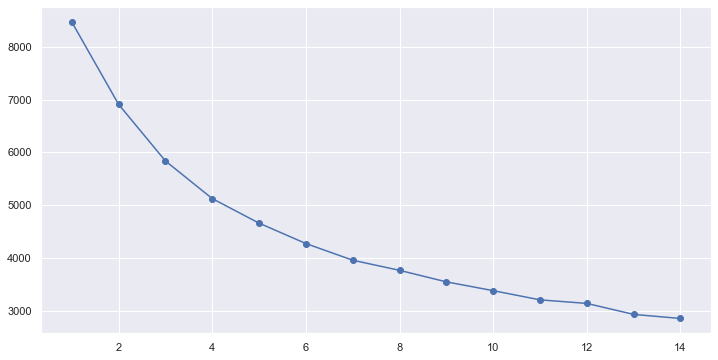

In [576]:
matplot.figure(figsize=(12,6))
matplot.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

For n_clusters = 2 The average silhouette_score is : 0.1859055142466452
For n_clusters = 3 The average silhouette_score is : 0.20760655380656112
For n_clusters = 4 The average silhouette_score is : 0.21846205712159025
For n_clusters = 5 The average silhouette_score is : 0.22805726901113016
For n_clusters = 6 The average silhouette_score is : 0.2243714425833029
For n_clusters = 7 The average silhouette_score is : 0.22838751434886423
For n_clusters = 8 The average silhouette_score is : 0.23281012838689508


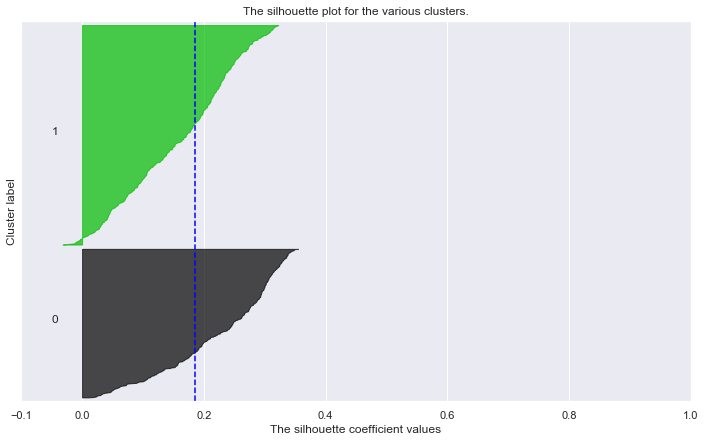

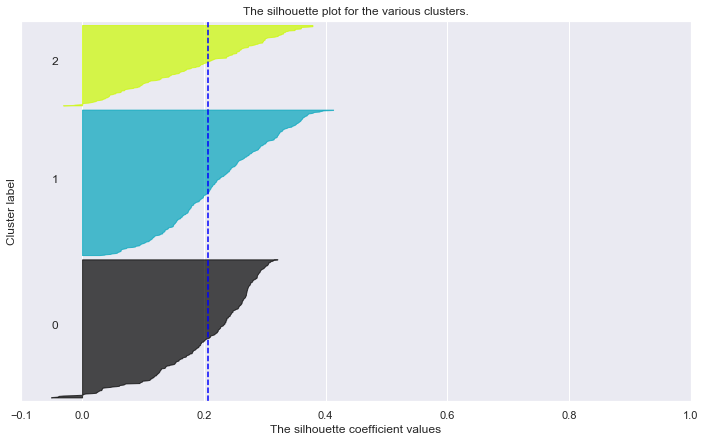

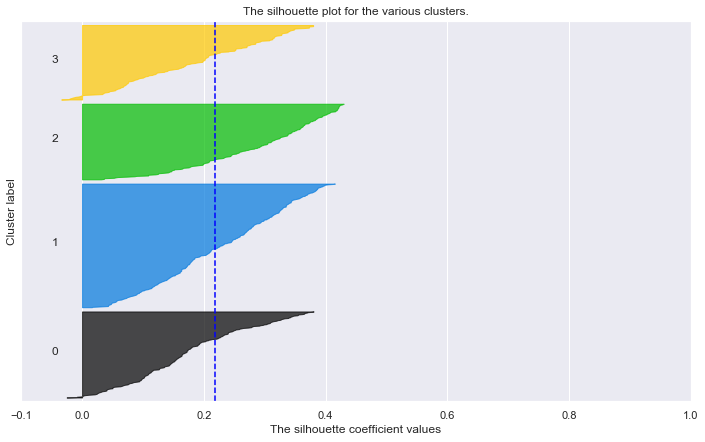

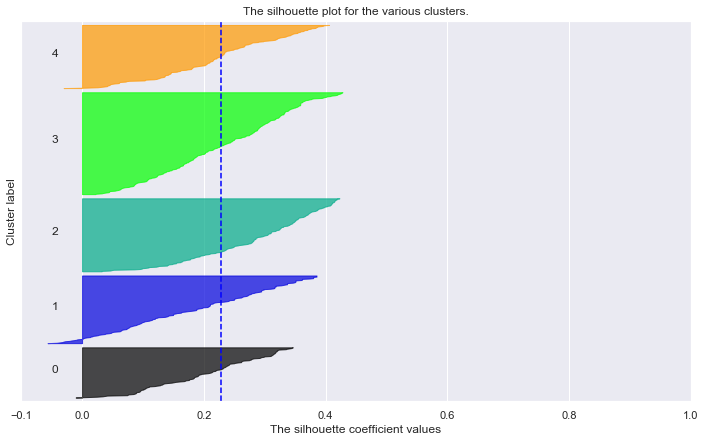

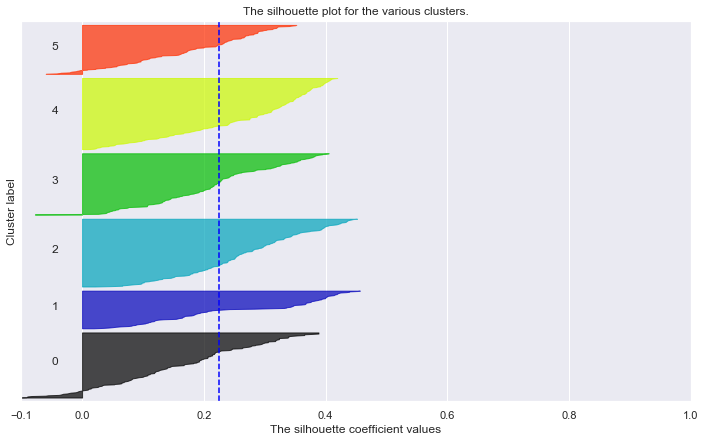

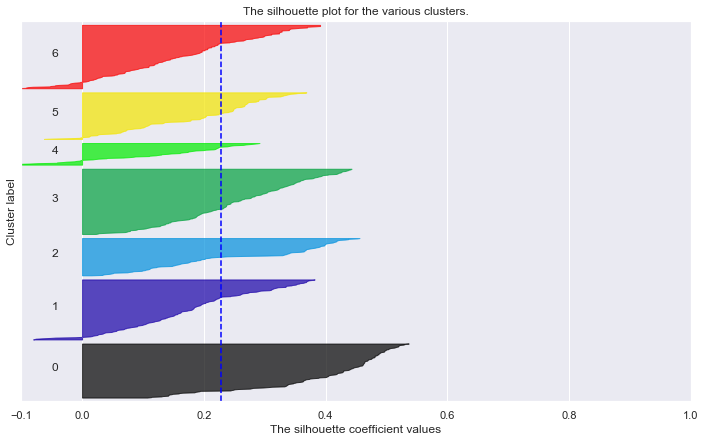

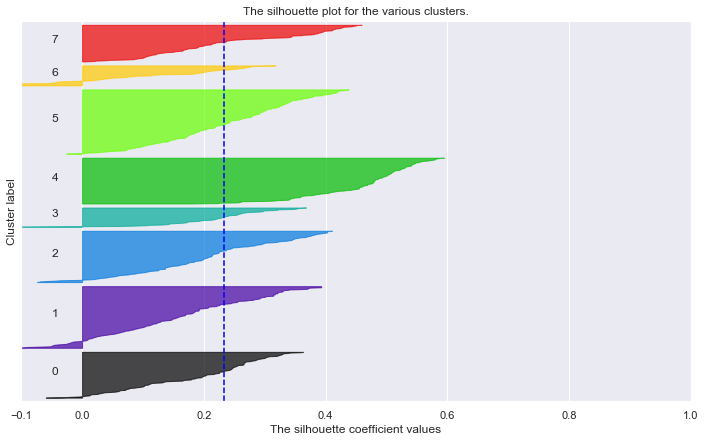

In [577]:
X = Source_scaled
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    fig, (ax1) = matplot.subplots(1)
    fig.set_size_inches(12, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(numpy.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="blue", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

matplot.show()

In [578]:
# There is no perfect elbow seen in elbow chart further analysing both elbow chart and Silhoutte's score, 
# next possible cluster can be n_clusters = 8 as it shows the next best Silhoutte score. 
# Hence cluster 8 may be a good number may be an ideal cluster number

In [579]:
# k = 8

Source_scaled_cluster = Source_scaled.copy()

cluster = KMeans( n_clusters = 8, random_state = 2354 )
cluster.fit(Source_scaled_cluster)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2354, tol=0.0001, verbose=0)

In [580]:
# Creating a new column "GROUP" which will hold the cluster id of each record
prediction= cluster.predict(Source_scaled_cluster)
Source_scaled_cluster["GROUP"] = prediction     
# Creating a mirror copy for later re-use instead of building repeatedly
Source_scaled_cluster_copy = Source_scaled_cluster.copy(deep = True)

In [581]:
centroids = cluster.cluster_centers_
centroids

array([[ 0.40858003, -0.85574028, -0.90191519,  0.48715029, -1.13650609,
         0.63484725,  0.31597773, -0.57514011, -0.81475045],
       [ 1.02044231,  0.56240476, -0.56435938, -0.9315101 ,  1.00629053,
        -0.58975105,  0.07054533,  0.04187407,  1.24660288],
       [-0.51378408, -0.68497117,  1.05855522, -0.60926006,  0.50163177,
         0.5069719 ,  0.3757649 , -0.56872255, -0.55134183],
       [-0.17870835,  0.19784699, -0.87308091,  1.03431006, -1.15345023,
        -0.13732706,  0.10035956,  2.0943698 ,  0.23013396],
       [ 1.83507195, -0.62911666, -0.63925986,  0.99640276, -0.95136052,
         0.3360993 , -1.61379758, -0.06210684,  0.53502499],
       [-0.81538422,  1.36678555, -0.88559304,  0.57800422, -0.71753502,
         0.0213295 , -0.20327243, -0.52267756, -0.70224629],
       [-0.49085825,  0.21158719,  1.04532695,  0.61076553,  0.48058618,
        -1.1891904 , -0.35602336, -0.18835088, -0.21286183],
       [-0.53994992, -0.59902056,  0.96324051, -0.65099884,  0

In [582]:
centroid_df = pandas.DataFrame(centroids, columns = list(Source_scaled) )
centroid_df

cement      slag       ash     water  superplastic  coarseagg   fineagg  \
0  0.408580 -0.855740 -0.901915  0.487150     -1.136506   0.634847  0.315978   
1  1.020442  0.562405 -0.564359 -0.931510      1.006291  -0.589751  0.070545   
2 -0.513784 -0.684971  1.058555 -0.609260      0.501632   0.506972  0.375765   
3 -0.178708  0.197847 -0.873081  1.034310     -1.153450  -0.137327  0.100360   
4  1.835072 -0.629117 -0.639260  0.996403     -0.951361   0.336099 -1.613798   
5 -0.815384  1.366786 -0.885593  0.578004     -0.717535   0.021329 -0.203272   
6 -0.490858  0.211587  1.045327  0.610766      0.480586  -1.189190 -0.356023   
7 -0.539950 -0.599021  0.963241 -0.650999      0.384709   0.648096  0.446513   

        age  strength  
0 -0.575140 -0.814750  
1  0.041874  1.246603  
2 -0.568723 -0.551342  
3  2.094370  0.230134  
4 -0.062107  0.535025  
5 -0.522678 -0.702246  
6 -0.188351 -0.212862  
7  1.573170  0.702385

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a361c1550>,
      dtype=object)

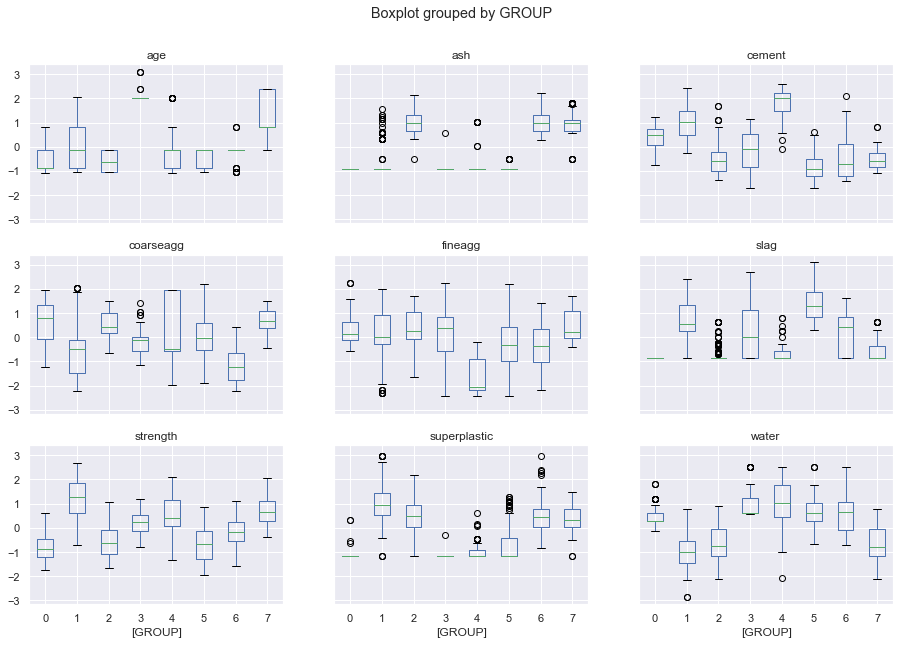

In [583]:
## centroids and the data in the cluster into box plots.
import matplotlib.pylab as plt
Source_scaled_cluster.boxplot(by = 'GROUP',  layout=(3,3), figsize=(15, 10))

In [584]:
# None of the dimensions are good predictor of target variable.
# For all the dimensions (variables) every cluster have a similar range of values except in one case.
# We can see that the body of the cluster are overlapping.
# So in k means, though, there are clusters in datasets on different dimensions. 
# But we can not see any distinct characteristics of these clusters which tell us to break data into 
# different clusters and build separate models for them.

In [585]:
#independent and dependent variables

X = Source_scaled.iloc[:,0:8]
y = Source_scaled.iloc[:,8]

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)



# Random Forest Regressor

In [586]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [587]:
y_pred = model.predict(X_test)

# performance on train data
print('Performance on training data using RFR:',model.score(X_train, y_train))

# performance on test data
print('Performance on testing data using RFR:',model.score(X_test, y_test))

#Evaluate the model using accuracy
acc_RFR = metrics.r2_score(y_test, y_pred)
print('Accuracy RFR: ',acc_RFR)

print('MSE: ', metrics.mean_squared_error(y_test, y_pred))

Performance on training data using RFR: 0.9825805421121542
Performance on testing data using RFR: 0.8536623067189165
Accuracy RFR:  0.8536623067189165
MSE:  0.15166602001645543


In [588]:
# This is a overfitting model

In [589]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pandas.DataFrame({'Method':['Random Forest Regressor'], 'accuracy': [acc_RFR]},index={'7'})
results = pandas.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                Decision Tree  0.801043
2         Decision Tree k fold  0.867064
3             Decision Tree k2  0.800952
4         Pruned Decision Tree  0.640019
5  Pruned Decision Tree K Fold  0.680130
6      Pruned Decision Tree k2  0.798092
7      Random Forest Regressor  0.853662

# K fold cross validation

In [590]:
seed = 66
kfold = model_selection.KFold(n_splits=10)

results1 = cross_val_score(model, X, y, cv = kfold)

accuracy = numpy.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.9081027917275787
Standard Deviation:  0.02365460990560055


In [591]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pandas.DataFrame({'Method':['Random Forest Regressor k fold'], 'accuracy': [accuracy]},index={'8'})
results = pandas.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                   Decision Tree  0.801043
2            Decision Tree k fold  0.867064
3                Decision Tree k2  0.800952
4            Pruned Decision Tree  0.640019
5     Pruned Decision Tree K Fold  0.680130
6         Pruned Decision Tree k2  0.798092
7         Random Forest Regressor  0.853662
8  Random Forest Regressor k fold  0.908103

# Gradient Boosting Regressor


In [592]:
# GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary 
# differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given 
# loss function.

In [593]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [594]:
y_pred = model.predict(X_test)

# performance on train data
print('Performance on training data using GBR:',model.score(X_train, y_train))

# performance on test data
print('Performance on testing data using GBR:',model.score(X_test, y_test))

#Evaluate the model using accuracy
acc_GBR = metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_GBR)

print('MSE: ', metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.9584398049109949
Performance on testing data using GBR: 0.8740360235195295
Accuracy DT:  0.8740360235195295
MSE:  0.13055047233486036


In [595]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pandas.DataFrame({'Method':['Gradient Boost Regressor'], 'accuracy': [acc_GBR]},index={'9'})
results = pandas.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                   Decision Tree  0.801043
2            Decision Tree k fold  0.867064
3                Decision Tree k2  0.800952
4            Pruned Decision Tree  0.640019
5     Pruned Decision Tree K Fold  0.680130
6         Pruned Decision Tree k2  0.798092
7         Random Forest Regressor  0.853662
8  Random Forest Regressor k fold  0.908103
9        Gradient Boost Regressor  0.874036

# K fold cross validation

In [596]:
seed = 66
kfold = model_selection.KFold(n_splits=10)

results1 = cross_val_score(model, X, y, cv = kfold)

accuracy = numpy.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8998124982492737
Standard Deviation:  0.024358356701807037


In [597]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pandas.DataFrame({'Method':['Gradient Boost Regressor k fold'], 'accuracy': [accuracy]},index={'10'})
results = pandas.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                     Decision Tree  0.801043
2              Decision Tree k fold  0.867064
3                  Decision Tree k2  0.800952
4              Pruned Decision Tree  0.640019
5       Pruned Decision Tree K Fold  0.680130
6           Pruned Decision Tree k2  0.798092
7           Random Forest Regressor  0.853662
8    Random Forest Regressor k fold  0.908103
9          Gradient Boost Regressor  0.874036
10  Gradient Boost Regressor k fold  0.899812

# Ada Boosting Regressor


In [598]:
# An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and 
# then fits additional copies of the regressor on the same dataset but where the weights of instances are 
# adjusted according to the error of the current prediction.

In [599]:
model = AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [600]:
y_pred = model.predict(X_test)

# performance on train data
print('Performance on training data using ABR:',model.score(X_train, y_train))

# performance on test data
print('Performance on testing data using ABR:',model.score(X_test, y_test))

#Evaluate the model using accuracy
acc_ABR = metrics.r2_score(y_test, y_pred)
print('Accuracy ABR: ',acc_ABR)

print('MSE: ', metrics.mean_squared_error(y_test, y_pred))

Performance on training data using ABR: 0.8380523214064115
Performance on testing data using ABR: 0.7752957583126905
Accuracy ABR:  0.7752957583126905
MSE:  0.23288598619679984


In [601]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pandas.DataFrame({'Method':['AdaBoost regressor'], 'accuracy': [acc_ABR]},index={'11'})
results = pandas.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                     Decision Tree  0.801043
2              Decision Tree k fold  0.867064
3                  Decision Tree k2  0.800952
4              Pruned Decision Tree  0.640019
5       Pruned Decision Tree K Fold  0.680130
6           Pruned Decision Tree k2  0.798092
7           Random Forest Regressor  0.853662
8    Random Forest Regressor k fold  0.908103
9          Gradient Boost Regressor  0.874036
10  Gradient Boost Regressor k fold  0.899812
11               AdaBoost regressor  0.775296

# K fold cross validation

In [602]:
seed = 66
kfold = model_selection.KFold(n_splits=10)

results1 = cross_val_score(model, X, y, cv = kfold)

accuracy = numpy.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.7841384141054439
Standard Deviation:  0.03947325558553505


In [603]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pandas.DataFrame({'Method':['AdaBoost regressor k fold'], 'accuracy': [accuracy]},index={'12'})
results = pandas.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                     Decision Tree  0.801043
2              Decision Tree k fold  0.867064
3                  Decision Tree k2  0.800952
4              Pruned Decision Tree  0.640019
5       Pruned Decision Tree K Fold  0.680130
6           Pruned Decision Tree k2  0.798092
7           Random Forest Regressor  0.853662
8    Random Forest Regressor k fold  0.908103
9          Gradient Boost Regressor  0.874036
10  Gradient Boost Regressor k fold  0.899812
11               AdaBoost regressor  0.775296
12        AdaBoost regressor k fold  0.784138

# Bagging Regressor

In [604]:
# A Bagging regressor is an ensemble meta-estimator that fits base regressors each on random subsets of the 
# original dataset and then aggregate their individual predictions (either by voting or by averaging) to form 
# a final prediction

In [605]:
model = BaggingRegressor()
model.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [606]:
y_pred = model.predict(X_test)

# performance on train data
print('Performance on training data using BR:',model.score(X_train, y_train))

# performance on test data
print('Performance on testing data using BR:',model.score(X_test, y_test))

#Evaluate the model using accuracy
acc_BR = metrics.r2_score(y_test, y_pred)
print('Accuracy BR: ',acc_BR)

print('MSE: ', metrics.mean_squared_error(y_test, y_pred))

Performance on training data using BR: 0.9816962836837626
Performance on testing data using BR: 0.8690234815487823
Accuracy BR:  0.8690234815487823
MSE:  0.13574552682713265


In [607]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pandas.DataFrame({'Method':['Bagging regressor '], 'accuracy': [acc_BR]},index={'13'})
results = pandas.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                     Decision Tree  0.801043
2              Decision Tree k fold  0.867064
3                  Decision Tree k2  0.800952
4              Pruned Decision Tree  0.640019
5       Pruned Decision Tree K Fold  0.680130
6           Pruned Decision Tree k2  0.798092
7           Random Forest Regressor  0.853662
8    Random Forest Regressor k fold  0.908103
9          Gradient Boost Regressor  0.874036
10  Gradient Boost Regressor k fold  0.899812
11               AdaBoost regressor  0.775296
12        AdaBoost regressor k fold  0.784138
13               Bagging regressor   0.869023

# K fold cross validation

In [608]:
seed = 66
kfold = model_selection.KFold(n_splits=10)

results1 = cross_val_score(model, X, y, cv = kfold)

accuracy = numpy.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.9008685617440195
Standard Deviation:  0.03249835011090559


In [609]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pandas.DataFrame({'Method':['Bagging regressor k fold'], 'accuracy': [accuracy]},index={'14'})
results = pandas.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                     Decision Tree  0.801043
2              Decision Tree k fold  0.867064
3                  Decision Tree k2  0.800952
4              Pruned Decision Tree  0.640019
5       Pruned Decision Tree K Fold  0.680130
6           Pruned Decision Tree k2  0.798092
7           Random Forest Regressor  0.853662
8    Random Forest Regressor k fold  0.908103
9          Gradient Boost Regressor  0.874036
10  Gradient Boost Regressor k fold  0.899812
11               AdaBoost regressor  0.775296
12        AdaBoost regressor k fold  0.784138
13               Bagging regressor   0.869023
14         Bagging regressor k fold  0.900869

# KNN Regressor

In [610]:
# Regression based on k-nearest neighbors.

# The target is predicted by local interpolation of the targets associated of the nearest neighbors in the 
# training set.

In [611]:
# Import KNN Regressor machine learning library
from sklearn.neighbors import KNeighborsRegressor
error = []
for i in range(1,30):
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(numpy.mean(pred_i != y_test))

Text(0, 0.5, 'Mean error')

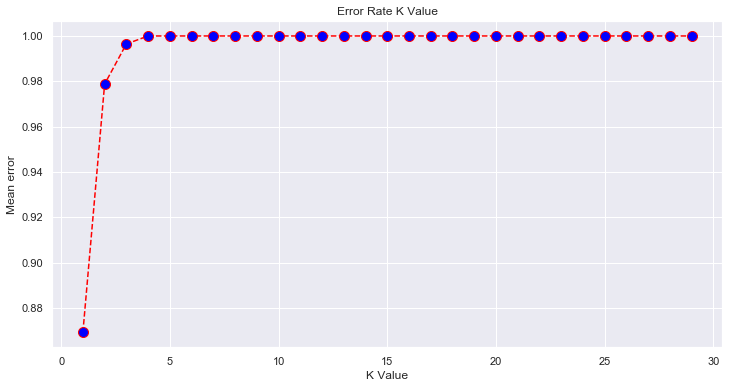

In [612]:
plt.figure(figsize=(12,6))
plt.plot(range(1,30), error, color = 'red', linestyle = 'dashed', marker = 'o',markerfacecolor='blue', markersize = 10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

In [613]:
#k = 3
model = KNeighborsRegressor(n_neighbors = 3)
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [614]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using KNNR:', model.score(X_train, y_train))
# performance on test data
print('Performance on testing data using KNNR:',model.score(X_test, y_test))
#Evaluate the model using accuracy
acc_K = metrics.r2_score(y_test, y_pred)
print('Accuracy KNNR: ', acc_K)
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))

Performance on training data using KNNR: 0.8998746670797365
Performance on testing data using KNNR: 0.7563224130455755
Accuracy KNNR:  0.7563224130455755
MSE:  0.252550173177895


In [615]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pandas.DataFrame({'Method':['KNN regressor'], 'accuracy': [acc_K]},index={'15'})
results = pandas.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                     Decision Tree  0.801043
2              Decision Tree k fold  0.867064
3                  Decision Tree k2  0.800952
4              Pruned Decision Tree  0.640019
5       Pruned Decision Tree K Fold  0.680130
6           Pruned Decision Tree k2  0.798092
7           Random Forest Regressor  0.853662
8    Random Forest Regressor k fold  0.908103
9          Gradient Boost Regressor  0.874036
10  Gradient Boost Regressor k fold  0.899812
11               AdaBoost regressor  0.775296
12        AdaBoost regressor k fold  0.784138
13               Bagging regressor   0.869023
14         Bagging regressor k fold  0.900869
15                    KNN regressor  0.756322

# K fold cross validation

In [616]:
seed = 66
kfold = model_selection.KFold(n_splits=10)

results1 = cross_val_score(model, X, y, cv = kfold)

accuracy = numpy.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.7890606355058389
Standard Deviation:  0.033037433299387936


In [617]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pandas.DataFrame({'Method':['KNN regressor k fold'], 'accuracy': [accuracy]},index={'16'})
results = pandas.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                     Decision Tree  0.801043
2              Decision Tree k fold  0.867064
3                  Decision Tree k2  0.800952
4              Pruned Decision Tree  0.640019
5       Pruned Decision Tree K Fold  0.680130
6           Pruned Decision Tree k2  0.798092
7           Random Forest Regressor  0.853662
8    Random Forest Regressor k fold  0.908103
9          Gradient Boost Regressor  0.874036
10  Gradient Boost Regressor k fold  0.899812
11               AdaBoost regressor  0.775296
12        AdaBoost regressor k fold  0.784138
13               Bagging regressor   0.869023
14         Bagging regressor k fold  0.900869
15                    KNN regressor  0.756322
16             KNN regressor k fold  0.789061

# Support Vector Regressor

In [618]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [619]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using SVR:',model.score(X_train, y_train))
# performance on test data
print('Performance on testing data using SVR:',model.score(X_test, y_test))
#Evaluate the model using accuracy
acc_S = metrics.r2_score(y_test, y_pred)
print('Accuracy SVR: ', acc_S)
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))

Performance on training data using SVR: 0.7721644886486776
Performance on testing data using SVR: 0.7581569554920151
Accuracy SVR:  0.7581569554920151
MSE:  0.25064883289321316


In [620]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pandas.DataFrame({'Method':['Support Vector regressor'], 'accuracy': [acc_S]},index={'17'})
results = pandas.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                     Decision Tree  0.801043
2              Decision Tree k fold  0.867064
3                  Decision Tree k2  0.800952
4              Pruned Decision Tree  0.640019
5       Pruned Decision Tree K Fold  0.680130
6           Pruned Decision Tree k2  0.798092
7           Random Forest Regressor  0.853662
8    Random Forest Regressor k fold  0.908103
9          Gradient Boost Regressor  0.874036
10  Gradient Boost Regressor k fold  0.899812
11               AdaBoost regressor  0.775296
12        AdaBoost regressor k fold  0.784138
13               Bagging regressor   0.869023
14         Bagging regressor k fold  0.900869
15                    KNN regressor  0.756322
16             KNN regressor k fold  0.789061
17         Support Vector regressor  0.758157

# K fold cross validation

In [621]:
seed = 66
kfold = model_selection.KFold(n_splits=10)

results1 = cross_val_score(model, X, y, cv = kfold)

accuracy = numpy.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.7534318085606624
Standard Deviation:  0.05046791769888095


In [622]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pandas.DataFrame({'Method':['Support Vector regressor k fold'], 'accuracy': [accuracy]},index={'18'})
results = pandas.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                     Decision Tree  0.801043
2              Decision Tree k fold  0.867064
3                  Decision Tree k2  0.800952
4              Pruned Decision Tree  0.640019
5       Pruned Decision Tree K Fold  0.680130
6           Pruned Decision Tree k2  0.798092
7           Random Forest Regressor  0.853662
8    Random Forest Regressor k fold  0.908103
9          Gradient Boost Regressor  0.874036
10  Gradient Boost Regressor k fold  0.899812
11               AdaBoost regressor  0.775296
12        AdaBoost regressor k fold  0.784138
13               Bagging regressor   0.869023
14         Bagging regressor k fold  0.900869
15                    KNN regressor  0.756322
16             KNN regressor k fold  0.789061
17         Support Vector regressor  0.758157
18  Support Vector regressor k fold  0.753432

# Ensemeble KNN Regressor, SVR, LR

In [623]:
# Multiple model Ensemble

from sklearn import svm
LR = LinearRegression()
KN = KNeighborsRegressor(n_neighbors = 3)
SVM = svm.SVR(kernel='linear')

In [624]:
evc = VotingRegressor(estimators=[('LR',LR),('KN',KN),('SVM',SVM)])
evc.fit(X_train, y_train)

VotingRegressor(estimators=[('LR',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('KN',
                             KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=3,
                                                 p=2, weights='uniform')),
                            ('SVM',
                             SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='linear', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False))],
                n_jobs=None, weights=None)

In [625]:
y_pred = evc.predict(X_test)
# performance on train data
print('Performance on training data using ensemble:',evc.score(X_train,y_train))
# performance on test data
print('Performance on testing data using ensemble:',evc.score(X_test,y_test))
#Evaluate the model using accuracy
acc_E = metrics.r2_score(y_test, y_pred)
print('Accuracy ensemble: ',acc_E)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using ensemble: 0.8496945314894948
Performance on testing data using ensemble: 0.7923124715629044
Accuracy ensemble:  0.7923124715629044
MSE:  0.21524967449504323


In [626]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pandas.DataFrame({'Method':['Ensemble'], 'accuracy': [acc_E]},index={'19'})
results = pandas.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                     Decision Tree  0.801043
2              Decision Tree k fold  0.867064
3                  Decision Tree k2  0.800952
4              Pruned Decision Tree  0.640019
5       Pruned Decision Tree K Fold  0.680130
6           Pruned Decision Tree k2  0.798092
7           Random Forest Regressor  0.853662
8    Random Forest Regressor k fold  0.908103
9          Gradient Boost Regressor  0.874036
10  Gradient Boost Regressor k fold  0.899812
11               AdaBoost regressor  0.775296
12        AdaBoost regressor k fold  0.784138
13               Bagging regressor   0.869023
14         Bagging regressor k fold  0.900869
15                    KNN regressor  0.756322
16             KNN regressor k fold  0.789061
17         Support Vector regressor  0.758157
18  Support Vector regressor k fold  0.753432
19                         Ensemble  0.792312

# K fold cross validation

In [627]:
seed = 66
kfold = model_selection.KFold(n_splits=10)

results1 = cross_val_score(evc, X, y, cv = kfold)

accuracy = numpy.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8026991418220494
Standard Deviation:  0.032745151792416924


In [628]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pandas.DataFrame({'Method':['Ensemble k fold'], 'accuracy': [accuracy]},index={'20'})
results = pandas.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                     Decision Tree  0.801043
2              Decision Tree k fold  0.867064
3                  Decision Tree k2  0.800952
4              Pruned Decision Tree  0.640019
5       Pruned Decision Tree K Fold  0.680130
6           Pruned Decision Tree k2  0.798092
7           Random Forest Regressor  0.853662
8    Random Forest Regressor k fold  0.908103
9          Gradient Boost Regressor  0.874036
10  Gradient Boost Regressor k fold  0.899812
11               AdaBoost regressor  0.775296
12        AdaBoost regressor k fold  0.784138
13               Bagging regressor   0.869023
14         Bagging regressor k fold  0.900869
15                    KNN regressor  0.756322
16             KNN regressor k fold  0.789061
17         Support Vector regressor  0.758157
18  Support Vector regressor k fold  0.753432
19                         Ensemble  0.792312
20                  Ensemble k fold  0.802699

In [629]:
# After applying all the models we can see that 
# Random Forest Regressor, 
# Random Forest Regressor k fold, 
# Gradient Boost Regressor, 
# Gradient Boost Regressor k fold, 
# Bagging Regressor 
# Bagging regressor k fold
# are giving better results as compared to other models.

# Bootstrapping Method

In [630]:
# configure bootstrap
values = Source_scaled.values
n_iterations = 1000               # Number of bootstrap samples to create
n_size = int(len(Source_scaled) * 0.50)    # picking only 50 % of the given data in every bootstrap sample

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = numpy.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    gbmTree = GradientBoostingRegressor(n_estimators=50)
    # fit against independent variables and corresponding target values
    gbmTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = gbmTree.score(test[:, :-1] , y_test)
    predictions = gbmTree.predict(test[:, :-1])  

    stats.append(score)


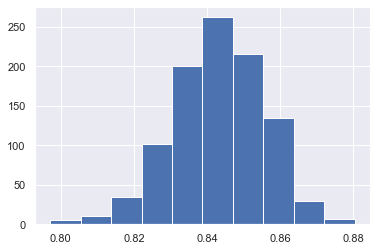

95.0 confidence interval 81.7% and 86.5%


In [631]:
# plot scores
from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0 - alpha) / 2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, numpy.percentile(stats, p))  
p = (alpha+((1.0 - alpha) / 2.0)) * 100
upper = min(1.0, numpy.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha * 100, lower * 100, upper * 100))

In [632]:
# configure bootstrap
values = Source_scaled.values
n_iterations = 1000               # Number of bootstrap samples to create
n_size = int(len(Source_scaled) * 0.50)    # picking only 50 % of the given data in every bootstrap sample


# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = numpy.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    rfTree = RandomForestRegressor(n_estimators=100)
    # fit against independent variables and corresponding target values
    rfTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = rfTree.score(test[:, :-1] , y_test)
    predictions = rfTree.predict(test[:, :-1])  

    stats.append(score)

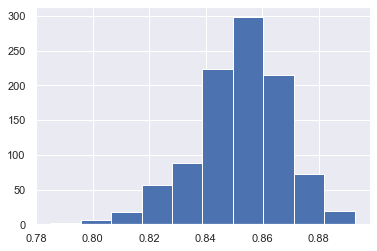

95.0 confidence interval 81.7% and 88.0%


In [633]:
# plot scores
from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0 - alpha) / 2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, numpy.percentile(stats, p))  
p = (alpha+((1.0 - alpha) / 2.0)) * 100
upper = min(1.0, numpy.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha * 100, lower * 100, upper * 100))

In [634]:
#independent and dependent variables

X = Source.iloc[:,0:8]
y = Source.iloc[:,8]

y
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33 ,random_state = 7)


In [635]:
print(X_test.shape)
print(y_test.shape)

(340, 8)
(340,)


# Optimizing model parameters


In [636]:
from pprint import pprint

In [637]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 1)


print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


# RandomSearchCV

In [638]:
import numpy as np
print(np.linspace(start = 5, stop = 10, num = 2))

[ 5. 10.]


In [639]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10 , stop = 15, num = 2)]   # returns evenly spaced 10 numbers
# Number of features to consider at every split
max_features = ['auto', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 10, None],
 'max_features': ['auto', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 15]}


In [640]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 5, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    3.1s finished


In [641]:
rf_random.best_params_

{'n_estimators': 15,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': None,
 'bootstrap': False}

In [642]:
best_random = rf_random.best_estimator_   # best ensemble model (with optimal combination of hyperparameters)

In [643]:
best_random.score(X_test , y_test)

0.9075505627330679

# GridSearcCV

In [644]:
from sklearn.model_selection import GridSearchCV

In [645]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [5,6],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [5,10],
    'n_estimators': [5,6,7]
}    

In [646]:
rf = RandomForestRegressor(random_state = 1)

In [647]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [648]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train);

In [649]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 6,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 7}

In [650]:
best_grid = grid_search.best_estimator_
best_grid.score(X_test, y_test)

0.8441002759124961

In [651]:
# The Girdsearch has lower probability of finding the best combination than the randomsearch